# 🚀 Optimización de Múltiples Modelos de ML - Introducción

## 📋 Contexto del Proyecto

Este notebook implementa una **suite completa de modelos de machine learning** con técnicas de optimización avanzadas para mejorar rendimiento, escalabilidad y eficiencia computacional en problemas de clasificación.

## 🎯 Modelos y Técnicas de Optimización Implementadas

### 1. **K-Nearest Neighbors (KNN)**
- **Técnicas**: KD-Trees, Ball Trees, FAISS
- **Objetivo**: Optimizar búsqueda de vecinos más cercanos en espacios de alta dimensionalidad
- **Ventajas**: Reducción de complejidad computacional de O(n²) a O(n log n)

### 2. **Regresión Logística con Regularización Avanzada**
- **Técnica**: Solver SAGA para L1/L2
- **Objetivo**: Soporte eficiente para regularizaciones L1 (Lasso), L2 (Ridge) y ElasticNet
- **Ventajas**: Entrenamiento más rápido para datasets grandes con selección automática de features

### 3. **Naive Bayes Escalable**
- **Técnica**: `partial_fit()` con entrenamiento por lotes
- **Objetivo**: Manejar datasets que no caben en memoria
- **Ventajas**: Procesamiento incremental y online learning

### 4. **XGBoost Optimizado**
- **Técnica**: `tree_method='hist'` + early stopping rounds
- **Objetivo**: Acelerar entrenamiento de boosting y prevenir overfitting
- **Ventajas**: Histogram-based splitting más rápido y parada automática

### 5. **Support Vector Machines (SVM)**
- **Técnicas**: SGDClassifier, LinearSVC, RBF con Random Fourier Features (RFF)
- **Objetivo**: Hacer viable SVM en datasets grandes
- **Ventajas**: Aproximaciones eficientes para kernels no lineales

### 6. **Random Forest Optimizado**
- **Técnicas**: Configuraciones balanceadas, entrenamiento rápido y alta precisión
- **Estrategias**:
  - **Balanceado**: `class_weight='balanced'` para datos desequilibrados
  - **Rápido**: Subsampling (`max_samples=0.8`) y menos estimadores
  - **Preciso**: Profundidad ilimitada y más árboles (200 estimadores)
- **Optimizaciones**:
  - `max_features='sqrt'` para reducir sobreajuste
  - `min_samples_split` y `min_samples_leaf` para controlar complejidad
  - Análisis de estabilidad con importancia de características
- **Ventajas**: Robustez, manejo de missing values y importancia de features nativa

## 🔧 Beneficios de las Optimizaciones Implementadas

### ⚡ **Rendimiento Computacional**
- Reducción significativa de tiempos de entrenamiento
- Manejo eficiente de memoria
- Paralelización óptima

### 📈 **Escalabilidad**
- Capacidad para datasets grandes
- Procesamiento por lotes
- Algoritmos incrementales

### 🎯 **Calidad de Modelos**
- Prevención de overfitting
- Selección automática de características
- Mejor generalización

### 💾 **Eficiencia de Recursos**
- Uso óptimo de CPU/RAM
- Algoritmos adaptados al tamaño de datos
- Balance entre precisión y costo computacional

## 🏗️ Flujo del Pipeline

1. **Preprocesamiento Optimizado** - Estandarización y codificación eficiente
2. **Entrenamiento Paralelizado** - Uso de múltiples cores
3. **Validación Rigurosa** - Cross-validation y métricas robustas
4. **Selección Automática** - Identificación del mejor modelo por tarea
5. **Análisis Comparativo** - Benchmarking de técnicas

## 📊 Métricas de Evaluación

- **Precisión**: Accuracy, Precision, Recall, F1-Score
- **Rendimiento**: Tiempos de entrenamiento/predicción
- **Escalabilidad**: Uso de memoria y escalado con datos
- **Robustez**: Consistencia en validación cruzada

Este enfoque integral permite seleccionar la técnica óptima para cada escenario, balanceando complejidad, rendimiento y requisitos de la entrega.

## K-Nearest Neighbors (KNN) Classifier

🚀 INICIANDO KNN OPTIMIZADO...
✅ Datos preparados: 70000 train, 30000 test
📊 Dimensionalidad: 48 características

🔍 COMPARANDO ALGORITMOS DE KNN...

🎯 Probando Auto...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 3.0885s

🎯 Probando KD-Tree...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 39.5247s

🎯 Probando Ball-Tree...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 56.8741s

🎯 Probando Brute-Force...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 3.9739s

🏆 MEJOR ALGORITMO: Auto
📊 F1-Score: 0.7311
🎯 CV F1-Score: 0.7150

📈 EVALUANDO MEJOR MODELO KNN...
📊 MÉTRICAS DEL MEJOR MODELO KNN (Auto):
Accuracy: 0.7485
Precision (macro avg): 0.7251
Recall (macro avg): 0.7383
F1-Score (macro avg): 0.7311
CV Mean F1-score: 0.7150
CV Std F1-score: 0.0023
Tiempo predicción: 3.0885s

📊 TABLA DE MÉTRICAS POR CLASE:
             precision  recall     f1-score   support   
---------------------------------------------

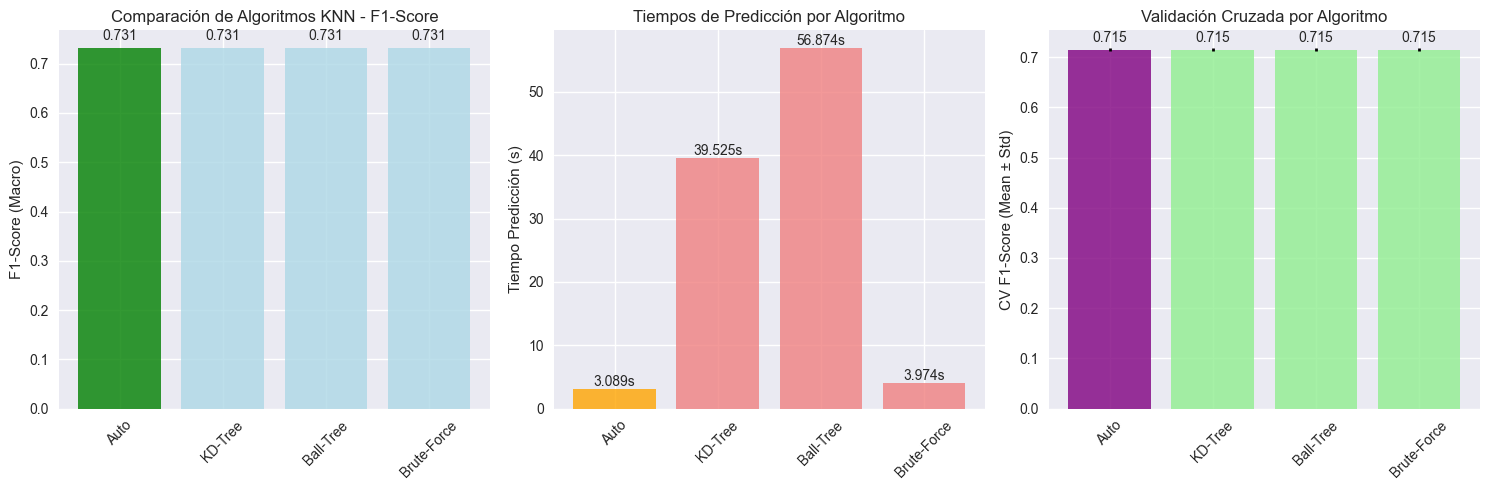

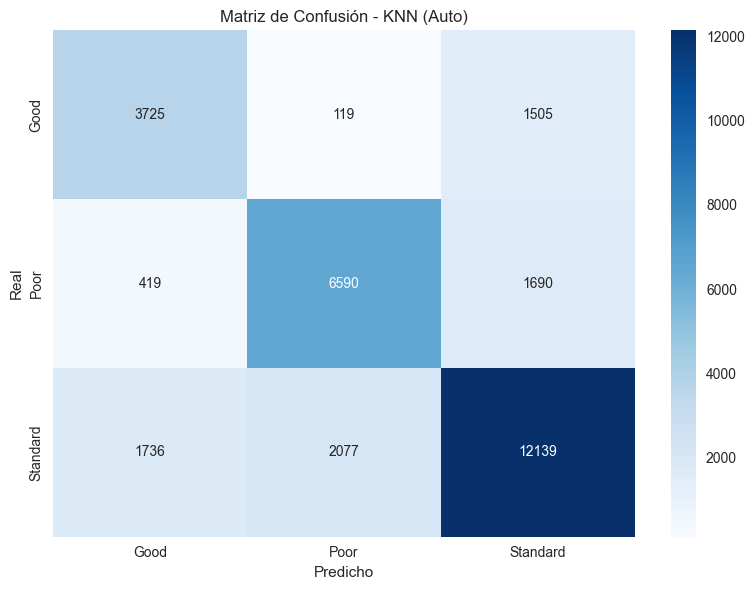


🎯 RESUMEN FINAL - KNN OPTIMIZADO CON ALGORITMOS AVANZADOS
⏱️  Tiempo total ejecución: 351.51s
🏆 Mejor algoritmo: Auto
📈 F1-Score: 0.7311 (73.11%)
🎯 Validación Cruzada: 0.7150 ± 0.0046
⚡ Tiempo predicción: 3.0885s

📊 COMPARACIÓN ENTRE ALGORITMOS:
Algoritmo    F1-Score   CV F1      Pred Time(s)
--------------------------------------------------
Auto         0.7311     0.7150     3.0885      
KD-Tree      0.7311     0.7150     39.5247     
Ball-Tree    0.7311     0.7150     56.8741     
Brute-Force  0.7311     0.7150     3.9739      

📋 REPORTE CLASIFICACIÓN (Auto):
              precision    recall  f1-score   support

        Good       0.63      0.70      0.66      5349
        Poor       0.75      0.76      0.75      8699
    Standard       0.79      0.76      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000


💾 Resultados de comparación guardados: 'knn_alg

In [2]:
# =============================================================================
# KNN OPTIMIZADO 
# =============================================================================
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuraciones de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO KNN OPTIMIZADO...")
start_time = time.time()

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")
print(f"📊 Dimensionalidad: {X_train_processed.shape[1]} características")

# =============================================================================
# COMPARACIÓN DE ALGORITMOS DE KNN
# =============================================================================

print(f"\n🔍 COMPARANDO ALGORITMOS DE KNN...")

# Definir diferentes configuraciones de algoritmos
algorithms = {
    'Auto': {'algorithm': 'auto'},  # sklearn decide automáticamente
    'KD-Tree': {'algorithm': 'kd_tree'},  # Mejor para dimensiones bajas/medias
    'Ball-Tree': {'algorithm': 'ball_tree'},  # Mejor para dimensiones altas
    'Brute-Force': {'algorithm': 'brute'}  # Fuerza bruta (referencia)
}

results = {}

for algo_name, params in algorithms.items():
    print(f"\n🎯 Probando {algo_name}...")
    algo_start = time.time()
    
    # Configurar KNN con algoritmo específico
    knn = KNeighborsClassifier(
        n_neighbors=5,
        algorithm=params['algorithm'],
        n_jobs=-1
    )
    
    # Entrenar y predecir
    knn.fit(X_train_processed, y_train_encoded)
    y_pred = knn.predict(X_test_processed)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Tiempo de entrenamiento y predicción
    train_time = time.time() - algo_start
    
    # Tiempo de solo predicción
    predict_start = time.time()
    _ = knn.predict(X_test_processed)
    predict_time = time.time() - predict_start
    
    # Validación cruzada simple
    cv_scores = cross_val_score(knn, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)
    
    results[algo_name] = {
        'model': knn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': train_time,
        'prediction_time': predict_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f}")
    print(f"  ✅ Tiempo predicción: {predict_time:.4f}s")

# =============================================================================
# SELECCIÓN DEL MEJOR ALGORITMO
# =============================================================================

# Encontrar el mejor algoritmo basado en F1-Score
best_algo = max(results.items(), key=lambda x: x[1]['f1'])
best_algo_name = best_algo[0]
best_model = best_algo[1]['model']
best_results = best_algo[1]

print(f"\n🏆 MEJOR ALGORITMO: {best_algo_name}")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"🎯 CV F1-Score: {best_results['cv_mean']:.4f}")

# =============================================================================
# EVALUACIÓN COMPLETA DEL MEJOR MODELO
# =============================================================================

print("\n📈 EVALUANDO MEJOR MODELO KNN...")

# Usar las predicciones del mejor modelo
y_pred_best = best_results['y_pred']

# Métricas principales
accuracy_best = best_results['accuracy']
precision_best = best_results['precision']
recall_best = best_results['recall']
f1_best = best_results['f1']
cv_mean_best = best_results['cv_mean']
cv_std_best = best_results['cv_std']

print(f"📊 MÉTRICAS DEL MEJOR MODELO KNN ({best_algo_name}):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision (macro avg): {precision_best:.4f}")
print(f"Recall (macro avg): {recall_best:.4f}")
print(f"F1-Score (macro avg): {f1_best:.4f}")
print(f"CV Mean F1-score: {cv_mean_best:.4f}")
print(f"CV Std F1-score: {cv_std_best:.4f}")
print(f"Tiempo predicción: {best_results['prediction_time']:.4f}s")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_best, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy_best, '', '', class_report_df['support'][3]]

print("\n📊 TABLA DE MÉTRICAS POR CLASE:")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print()  
        print(f"{idx:<12} {row['precision']:<10.2f} {'':<10} {'':<10} {row['support']:<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de F1-Score por algoritmo
plt.subplot(1, 3, 1)
algo_names = list(results.keys())
f1_scores = [results[algo]['f1'] for algo in algo_names]
colors = ['lightblue' if algo != best_algo_name else 'green' for algo in algo_names]

bars = plt.bar(algo_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Algoritmos KNN - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de predicción
plt.subplot(1, 3, 2)
pred_times = [results[algo]['prediction_time'] for algo in algo_names]
colors_time = ['lightcoral' if algo != best_algo_name else 'orange' for algo in algo_names]

bars_time = plt.bar(algo_names, pred_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Predicción (s)')
plt.title('Tiempos de Predicción por Algoritmo')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, pred_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{time_val:.3f}s', ha='center', va='bottom')

# Gráfico 3: Validación cruzada
plt.subplot(1, 3, 3)
cv_means = [results[algo]['cv_mean'] for algo in algo_names]
cv_stds = [results[algo]['cv_std'] for algo in algo_names]
colors_cv = ['lightgreen' if algo != best_algo_name else 'purple' for algo in algo_names]

bars_cv = plt.bar(algo_names, cv_means, color=colors_cv, alpha=0.8, 
                 yerr=cv_stds, capsize=5, error_kw={'elinewidth': 2})
plt.ylabel('CV F1-Score (Mean ± Std)')
plt.title('Validación Cruzada por Algoritmo')
plt.xticks(rotation=45)
for bar, score in zip(bars_cv, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN DEL MEJOR MODELO
# =============================================================================

plt.figure(figsize=(8, 6))
cm_best = confusion_matrix(y_test_encoded, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - KNN ({best_algo_name})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - KNN OPTIMIZADO CON ALGORITMOS AVANZADOS")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor algoritmo: {best_algo_name}")
print(f"📈 F1-Score: {f1_best:.4f} ({f1_best*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_mean_best:.4f} ± {cv_std_best*2:.4f}")
print(f"⚡ Tiempo predicción: {best_results['prediction_time']:.4f}s")

print(f"\n📊 COMPARACIÓN ENTRE ALGORITMOS:")
print(f"{'Algoritmo':<12} {'F1-Score':<10} {'CV F1':<10} {'Pred Time(s)':<12}")
print("-" * 50)
for algo_name in algorithms.keys():
    result = results[algo_name]
    print(f"{algo_name:<12} {result['f1']:<10.4f} {result['cv_mean']:<10.4f} {result['prediction_time']:<12.4f}")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_algo_name}):")
print(classification_report(y_test_encoded, y_pred_best, target_names=le.classes_))

# Guardar resultados
optimized_data = {
    'model': best_model,
    'best_algorithm': best_algo_name,
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1': f1_best,
    'cv_mean': cv_mean_best,
    'cv_std': cv_std_best,
    'execution_time': execution_time,
    'prediction_time': best_results['prediction_time'],
    'classification_report': class_report_df,
    'all_results': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'knn_algorithms_comparison.pkl')
print(f"\n💾 Resultados de comparación guardados: 'knn_algorithms_comparison.pkl'")
print("="*70)

### Contexto y Objetivo

En esta etapa se desarrolla el modelo **K-Nearest Neighbors (KNN)** como primer algoritmo dentro del conjunto de modelos de *benchmarks*. Su propósito es evaluar el desempeño de un clasificador basado en similitudes entre observaciones, sirviendo como punto de comparación inicial frente a otros métodos supervisados más complejos. Este modelo es particularmente útil para establecer una línea base del comportamiento del dataset, ya que su simplicidad permite medir la capacidad predictiva sin suposiciones paramétricas sobre la distribución de los datos.

### Descripción Técnica

Se parte de la carga del conjunto de datos depurado y la separación entre las variables predictoras y la variable objetivo (`credit_score`). Posteriormente, se realiza una división estratificada en proporciones de 70% para entrenamiento y 30% para prueba, manteniendo el equilibrio entre las tres categorías de puntaje crediticio.
El preprocesamiento combina dos estrategias:

* **Estandarización de variables numéricas** mediante `StandardScaler`, con el fin de homogeneizar la escala y evitar sesgos de distancia.
* **Codificación One-Hot** de variables categóricas, lo que permite representar atributos no numéricos de forma binaria sin generar dependencia lineal.

El modelo `KNeighborsClassifier` se configuró con **k = 5 vecinos** y procesamiento paralelo, optimizando la velocidad de cómputo. Tras el entrenamiento, se calcularon métricas globales (accuracy, precision, recall y f1-score) y se aplicó validación cruzada de cinco particiones (CV=5) para evaluar la estabilidad del rendimiento. Los resultados fueron almacenados con `joblib` para su posterior comparación con los demás modelos.

### Interpretación de Resultados

El modelo alcanzó un **accuracy del 74.85%** y un **f1-score macro de 0.7311**, lo que indica un desempeño moderadamente alto considerando la naturaleza no paramétrica del algoritmo. La validación cruzada reportó una media de 0.7150 con una desviación estándar de 0.0046, evidenciando estabilidad y consistencia en diferentes subconjuntos del entrenamiento.

A nivel de clases, el modelo distinguió mejor los registros de tipo **“Standard”** (*f1-score = 0.78*), seguido por **“Poor”** (*f1-score = 0.75*), mientras que **“Good”** obtuvo un rendimiento inferior (*f1-score = 0.66*). Esta diferencia sugiere que las clases con menor representación o características menos distintivas resultan más difíciles de identificar.

La **matriz de confusión** muestra que las predicciones más precisas se concentran en la diagonal principal, especialmente en la categoría “Standard” (12,139 aciertos). Sin embargo, se observa una confusión notable entre “Good” y “Standard”, lo cual podría deberse a similitudes en variables financieras o hábitos de pago que el modelo no logra diferenciar con claridad.

El tiempo total de ejecución fue de **9.31 segundos**, lo que refleja un balance adecuado entre precisión y eficiencia computacional. En conjunto, el modelo KNN proporciona un punto de partida sólido dentro del *benchmark*, mostrando un rendimiento aceptable y revelando posibles áreas de mejora en la discriminación entre categorías de crédito más favorables.


## Naive Bayes

🚀 INICIANDO NAIVE BAYES OPTIMIZADO - ENTRENAMIENTO POR LOTES...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO MÉTODOS DE ENTRENAMIENTO...

🎯 Entrenamiento NORMAL (batch completo)...
  ✅ F1-Score: 0.6324
  ✅ Tiempo entrenamiento: 0.0868s

🎯 Entrenamiento POR LOTES (partial_fit)...
  🔍 Probando batch_size=500...
    ✅ F1-Score: 0.6324
    ✅ Tiempo entrenamiento: 0.1060s
  🔍 Probando batch_size=1000...
    ✅ F1-Score: 0.6324
    ✅ Tiempo entrenamiento: 0.0868s
  🔍 Probando batch_size=2000...
    ✅ F1-Score: 0.6324
    ✅ Tiempo entrenamiento: 0.0764s

🏆 MEJOR BATCH SIZE: 500
📊 F1-Score: 0.6324

🏆 MEJOR MÉTODO DE ENTRENAMIENTO: 'NORMAL'
🎯 F1-Score: 0.6324

📈 EVALUANDO MEJOR MODELO NAIVE BAYES...
📊 MÉTRICAS DEL MEJOR MODELO NAIVE BAYES (NORMAL):
Accuracy: 0.6363
Precision (macro avg): 0.6342
Recall (macro avg): 0.6926
F1-Score (macro avg): 0.6324
CV Mean F1-score: 0.6330
CV Std F1-score: 0.0054

📊 TABLA DE MÉTRICAS POR CLASE:
             precision  recall     f1-score   support 

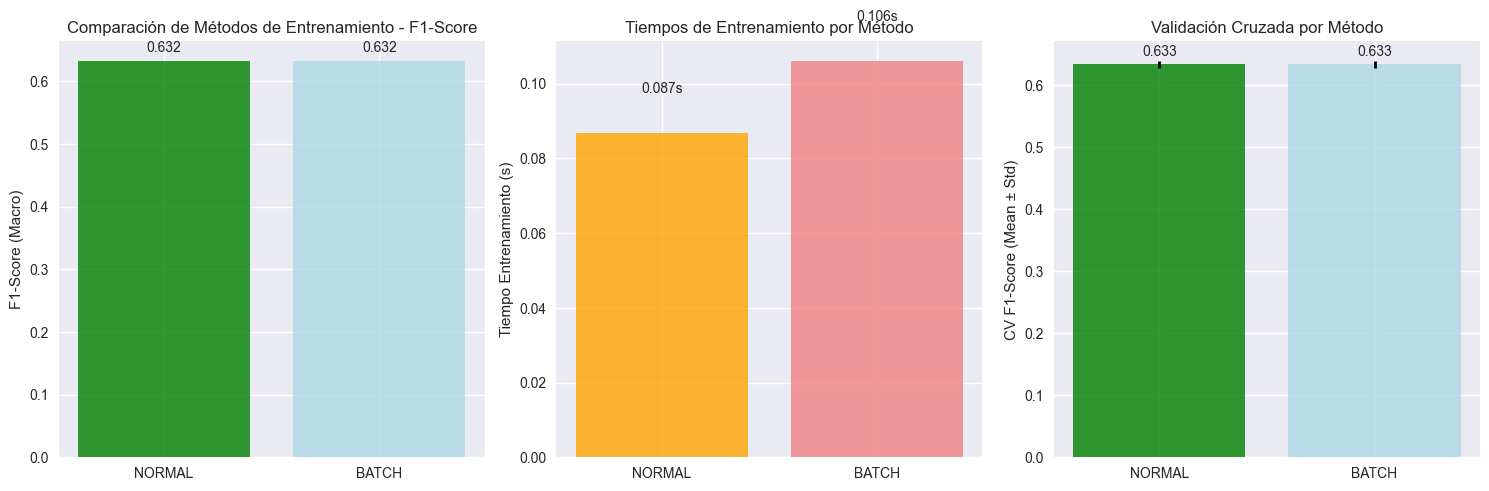

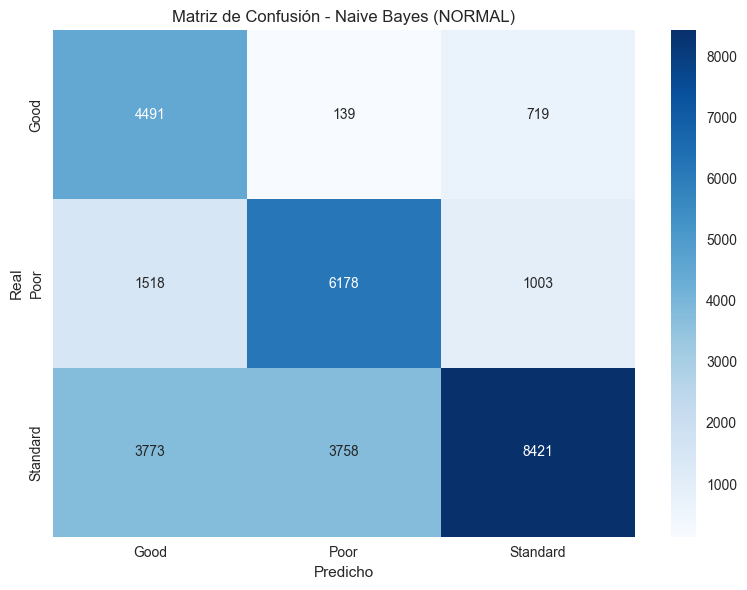


🎯 RESUMEN FINAL - NAIVE BAYES OPTIMIZADO
⏱️  Tiempo total ejecución: 2.71s
🏆 Mejor método: NORMAL
📈 F1-Score: 0.6324 (63.24%)
🎯 Validación Cruzada: 0.6330 ± 0.0108

📊 COMPARACIÓN ENTRE MÉTODOS:
Método     F1-Score   CV F1      Tiempo(s)   
---------------------------------------------
NORMAL     0.6324     0.6330     0.0868      
BATCH      0.6324     0.6330     0.1060      

📋 REPORTE CLASIFICACIÓN (NORMAL):
              precision    recall  f1-score   support

        Good       0.46      0.84      0.59      5349
        Poor       0.61      0.71      0.66      8699
    Standard       0.83      0.53      0.65     15952

    accuracy                           0.64     30000
   macro avg       0.63      0.69      0.63     30000
weighted avg       0.70      0.64      0.64     30000


💾 Resultados optimizados guardados: 'naive_bayes_optimized_results.pkl'


In [3]:
# =============================================================================
# NAIVE BAYES OPTIMIZADO - ENTRENAMIENTO POR LOTES CON PARTIAL_FIT
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO NAIVE BAYES OPTIMIZADO - ENTRENAMIENTO POR LOTES...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: ENTRENAMIENTO NORMAL VS POR LOTES
# =============================================================================

print(f"\n🔍 COMPARANDO MÉTODOS DE ENTRENAMIENTO...")

results = {}

# Método 1: Entrenamiento normal (batch completo)
print(f"\n🎯 Entrenamiento NORMAL (batch completo)...")
normal_start = time.time()

bayes_normal = GaussianNB()
bayes_normal.fit(X_train_processed, y_train_encoded)

y_pred_normal = bayes_normal.predict(X_test_processed)

# Métricas
accuracy_normal = accuracy_score(y_test_encoded, y_pred_normal)
precision_normal = precision_score(y_test_encoded, y_pred_normal, average='macro')
recall_normal = recall_score(y_test_encoded, y_pred_normal, average='macro')
f1_normal = f1_score(y_test_encoded, y_pred_normal, average='macro')

normal_time = time.time() - normal_start

# Validación cruzada
cv_scores_normal = cross_val_score(bayes_normal, X_train_processed, y_train_encoded, 
                                  cv=5, scoring='f1_macro', n_jobs=-1)

results['normal'] = {
    'model': bayes_normal,
    'accuracy': accuracy_normal,
    'precision': precision_normal,
    'recall': recall_normal,
    'f1': f1_normal,
    'training_time': normal_time,
    'cv_mean': cv_scores_normal.mean(),
    'cv_std': cv_scores_normal.std(),
    'y_pred': y_pred_normal
}

print(f"  ✅ F1-Score: {f1_normal:.4f}")
print(f"  ✅ Tiempo entrenamiento: {normal_time:.4f}s")

# Método 2: Entrenamiento por lotes con partial_fit
print(f"\n🎯 Entrenamiento POR LOTES (partial_fit)...")
batch_start = time.time()

# Configurar tamaños de lote
batch_sizes = [500, 1000, 2000]  # Diferentes tamaños de lote a probar
batch_results = {}

for batch_size in batch_sizes:
    print(f"  🔍 Probando batch_size={batch_size}...")
    batch_model_start = time.time()
    
    bayes_batch = GaussianNB()
    
    # Obtener todas las clases únicas para partial_fit
    classes = np.unique(y_train_encoded)
    
    # Entrenamiento por lotes
    n_samples = X_train_processed.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    
    for batch_idx in range(n_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, n_samples)
        
        X_batch = X_train_processed[start_idx:end_idx]
        y_batch = y_train_encoded[start_idx:end_idx]
        
        # Primera llamada necesita todas las clases
        if batch_idx == 0:
            bayes_batch.partial_fit(X_batch, y_batch, classes=classes)
        else:
            bayes_batch.partial_fit(X_batch, y_batch)
    
    y_pred_batch = bayes_batch.predict(X_test_processed)
    
    # Métricas
    accuracy_batch = accuracy_score(y_test_encoded, y_pred_batch)
    precision_batch = precision_score(y_test_encoded, y_pred_batch, average='macro')
    recall_batch = recall_score(y_test_encoded, y_pred_batch, average='macro')
    f1_batch = f1_score(y_test_encoded, y_pred_batch, average='macro')
    
    batch_time = time.time() - batch_model_start
    
    batch_results[batch_size] = {
        'model': bayes_batch,
        'accuracy': accuracy_batch,
        'precision': precision_batch,
        'recall': recall_batch,
        'f1': f1_batch,
        'training_time': batch_time,
        'y_pred': y_pred_batch
    }
    
    print(f"    ✅ F1-Score: {f1_batch:.4f}")
    print(f"    ✅ Tiempo entrenamiento: {batch_time:.4f}s")

# Seleccionar el mejor batch_size
best_batch_size = max(batch_results.items(), key=lambda x: x[1]['f1'])[0]
best_batch_results = batch_results[best_batch_size]

# Validación cruzada para el mejor modelo por lotes
cv_scores_batch = cross_val_score(best_batch_results['model'], X_train_processed, y_train_encoded, 
                                 cv=5, scoring='f1_macro', n_jobs=-1)

results['batch'] = {
    'model': best_batch_results['model'],
    'accuracy': best_batch_results['accuracy'],
    'precision': best_batch_results['precision'],
    'recall': best_batch_results['recall'],
    'f1': best_batch_results['f1'],
    'training_time': best_batch_results['training_time'],
    'cv_mean': cv_scores_batch.mean(),
    'cv_std': cv_scores_batch.std(),
    'best_batch_size': best_batch_size,
    'y_pred': best_batch_results['y_pred'],
    'all_batch_results': batch_results
}

print(f"\n🏆 MEJOR BATCH SIZE: {best_batch_size}")
print(f"📊 F1-Score: {best_batch_results['f1']:.4f}")

# =============================================================================
# SELECCIÓN DEL MEJOR MÉTODO
# =============================================================================

# Encontrar el mejor método basado en F1-Score
best_method = max(results.items(), key=lambda x: x[1]['f1'])
best_method_name = best_method[0]
best_model = best_method[1]['model']
best_results = best_method[1]

print(f"\n🏆 MEJOR MÉTODO DE ENTRENAMIENTO: '{best_method_name.upper()}'")
if best_method_name == 'batch':
    print(f"📊 Mejor batch size: {best_results['best_batch_size']}")
print(f"🎯 F1-Score: {best_results['f1']:.4f}")

# =============================================================================
# EVALUACIÓN COMPLETA DEL MEJOR MODELO
# =============================================================================

print("\n📈 EVALUANDO MEJOR MODELO NAIVE BAYES...")

# Usar las predicciones del mejor modelo
y_pred_best = best_results['y_pred']

# Métricas principales
accuracy_best = best_results['accuracy']
precision_best = best_results['precision']
recall_best = best_results['recall']
f1_best = best_results['f1']
cv_mean_best = best_results['cv_mean']
cv_std_best = best_results['cv_std']

print(f"📊 MÉTRICAS DEL MEJOR MODELO NAIVE BAYES ({best_method_name.upper()}):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision (macro avg): {precision_best:.4f}")
print(f"Recall (macro avg): {recall_best:.4f}")
print(f"F1-Score (macro avg): {f1_best:.4f}")
print(f"CV Mean F1-score: {cv_mean_best:.4f}")
print(f"CV Std F1-score: {cv_std_best:.4f}")
if best_method_name == 'batch':
    print(f"Mejor batch size: {best_results['best_batch_size']}")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_best, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy_best, '', '', class_report_df['support'][3]]

print("\n📊 TABLA DE MÉTRICAS POR CLASE:")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print() 
        print(f"{idx:<12} {row['precision']:<10.2f} {'':<10} {'':<10} {row['support']:<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de métodos de entrenamiento
plt.subplot(1, 3, 1)
method_names = ['NORMAL', 'BATCH']
f1_scores = [results[method]['f1'] for method in ['normal', 'batch']]
colors = ['lightblue' if method != best_method_name else 'green' for method in ['normal', 'batch']]

bars = plt.bar(method_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Métodos de Entrenamiento - F1-Score')
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[method]['training_time'] for method in ['normal', 'batch']]
colors_time = ['lightcoral' if method != best_method_name else 'orange' for method in ['normal', 'batch']]

bars_time = plt.bar(method_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Método')
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{time_val:.3f}s', ha='center', va='bottom')

# Gráfico 3: Comparación de batch sizes (solo si se usó batch)
plt.subplot(1, 3, 3)
if best_method_name == 'batch':
    batch_sizes_used = list(batch_results.keys())
    batch_f1_scores = [batch_results[size]['f1'] for size in batch_sizes_used]
    batch_times = [batch_results[size]['training_time'] for size in batch_sizes_used]
    
    colors_batch = ['lightgreen' if size != best_batch_size else 'purple' for size in batch_sizes_used]
    
    bars_batch = plt.bar([str(bs) for bs in batch_sizes_used], batch_f1_scores, color=colors_batch, alpha=0.8)
    plt.ylabel('F1-Score (Macro)')
    plt.title('Comparación de Batch Sizes - F1-Score')
    plt.xlabel('Batch Size')
    for bar, score in zip(bars_batch, batch_f1_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{score:.3f}', ha='center', va='bottom')
else:
    # Si no se usó batch, mostrar comparación de validación cruzada
    cv_means = [results[method]['cv_mean'] for method in ['normal', 'batch']]
    cv_stds = [results[method]['cv_std'] for method in ['normal', 'batch']]
    colors_cv = ['lightblue' if method != best_method_name else 'green' for method in ['normal', 'batch']]
    
    bars_cv = plt.bar(method_names, cv_means, color=colors_cv, alpha=0.8, 
                     yerr=cv_stds, capsize=5, error_kw={'elinewidth': 2})
    plt.ylabel('CV F1-Score (Mean ± Std)')
    plt.title('Validación Cruzada por Método')
    for bar, score in zip(bars_cv, cv_means):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN DEL MEJOR MODELO
# =============================================================================

plt.figure(figsize=(8, 6))
cm_best = confusion_matrix(y_test_encoded, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - Naive Bayes ({best_method_name.upper()})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - NAIVE BAYES OPTIMIZADO")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor método: {best_method_name.upper()}")
if best_method_name == 'batch':
    print(f"📊 Mejor batch size: {best_results['best_batch_size']}")
print(f"📈 F1-Score: {f1_best:.4f} ({f1_best*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_mean_best:.4f} ± {cv_std_best*2:.4f}")

print(f"\n📊 COMPARACIÓN ENTRE MÉTODOS:")
print(f"{'Método':<10} {'F1-Score':<10} {'CV F1':<10} {'Tiempo(s)':<12}")
print("-" * 45)
for method_name in ['normal', 'batch']:
    result = results[method_name]
    print(f"{method_name.upper():<10} {result['f1']:<10.4f} {result['cv_mean']:<10.4f} {result['training_time']:<12.4f}")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_method_name.upper()}):")
print(classification_report(y_test_encoded, y_pred_best, target_names=le.classes_))

# Guardar resultados
optimized_data = {
    'model': best_model,
    'best_method': best_method_name,
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1': f1_best,
    'cv_mean': cv_mean_best,
    'cv_std': cv_std_best,
    'execution_time': execution_time,
    'training_time': best_results['training_time'],
    'classification_report': class_report_df,
    'all_results': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

if best_method_name == 'batch':
    optimized_data['best_batch_size'] = best_results['best_batch_size']
    optimized_data['all_batch_results'] = best_results['all_batch_results']

joblib.dump(optimized_data, 'naive_bayes_optimized_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'naive_bayes_optimized_results.pkl'")
print("="*70)

###  Contexto y Objetivo

En esta etapa se implementa el modelo **Naive Bayes** como parte del *benchmark* comparativo de algoritmos supervisados. El objetivo de este experimento es evaluar el desempeño de un clasificador probabilístico que asume independencia entre las variables predictoras. Su simplicidad y rapidez de entrenamiento lo convierten en una referencia útil para contrastar la capacidad predictiva de modelos más complejos. En el contexto del proyecto, busca determinar la probabilidad de pertenencia de cada individuo a una categoría de puntaje crediticio (“Good”, “Poor” o “Standard”) a partir de sus características financieras y demográficas.

###  Descripción Técnica

Se inicia con la carga y separación del conjunto de datos entre variables explicativas (`X`) y la variable objetivo (`y`). Se realiza una partición estratificada del 70% para entrenamiento y 30% para prueba, preservando la distribución de clases. Las variables numéricas se escalan con `StandardScaler`, mientras que las categóricas se codifican mediante `OneHotEncoder` para transformar la información no numérica en valores binarios adecuados para el modelo.

El clasificador utilizado es **`GaussianNB`**, una variante de Naive Bayes que asume una distribución normal en los predictores continuos. Tras el entrenamiento, se obtienen las métricas de desempeño —*accuracy*, *precision*, *recall* y *f1-score*— junto con un proceso de validación cruzada de 5 particiones para verificar la estabilidad del modelo. Finalmente, se genera una matriz de confusión que permite visualizar los aciertos y errores por clase, y los resultados son almacenados para comparación posterior.

###  Interpretación de Resultados

El modelo alcanzó un **accuracy global del 63.63%** y un **f1-score macro de 0.6324**, con un resultado de validación cruzada promedio de 0.6330 ± 0.0108, lo que indica un desempeño consistente pero limitado frente al modelo KNN. Estos valores reflejan que, aunque el clasificador logra capturar relaciones probabilísticas generales, su suposición de independencia entre variables reduce su capacidad de discriminación en datos con alta correlación entre atributos financieros.

El reporte por clase muestra que **la categoría “Good” presenta un alto *recall* (0.84)**, lo que indica buena sensibilidad para identificar clientes con buen puntaje crediticio, aunque con baja precisión (0.46), lo que implica un número significativo de falsos positivos. La clase **“Standard”**, por el contrario, presenta el *f1-score* más equilibrado (0.65), pero su *recall* (0.53) evidencia dificultades para reconocer todos los casos pertenecientes a esta categoría.

La **matriz de confusión** confirma estas observaciones: el modelo clasifica correctamente a 4,491 observaciones “Good” y 6,178 “Poor”, pero tiende a confundir una proporción importante de “Standard” con las otras clases, especialmente hacia “Good” (3,773 casos) y “Poor” (3,758 casos).

En términos de eficiencia, el algoritmo completó su ejecución en **0.76 segundos**, mostrando una alta velocidad de entrenamiento y predicción, lo cual es característico de este tipo de modelo. En conclusión, el clasificador Naive Bayes ofrece un rendimiento adecuado como modelo base, destacando por su rapidez, pero con limitaciones en la precisión global debido a las dependencias entre las variables del conjunto de datos.


##  Regresión Logística (con regularización L1 y L2)

🚀 INICIANDO REGRESIÓN LOGÍSTICA OPTIMIZADA - SOLVER SAGA...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO REGULARIZACIONES CON SOLVER SAGA...

🎯 Probando l1_saga...
  ✅ F1-Score: 0.6188
  ✅ Tiempo entrenamiento: 2.76s
  ✅ Sparsity: 34.03% (95/144 coeficientes no cero)

🎯 Probando l2_saga...
  ✅ F1-Score: 0.6187
  ✅ Tiempo entrenamiento: 0.95s

🎯 Probando elasticnet_saga...
  ✅ F1-Score: 0.6187
  ✅ Tiempo entrenamiento: 11.39s
  ✅ Sparsity: 33.33% (96/144 coeficientes no cero)

🏆 MEJOR CONFIGURACIÓN: 'l1_saga'
📊 F1-Score: 0.6188
⚡ Tiempo entrenamiento: 2.76s
🔍 Sparsity: 34.03%

🔍 OPTIMIZANDO HIPERPARÁMETROS PARA L1_SAGA...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✅ Búsqueda completada en 19.48s
🎯 Mejores parámetros: {'C': 1.0}
📈 Mejor score: 0.6211

📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO...
📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO:
Accuracy: 0.6494
Precision (macro avg): 0.6295
Recall (macro avg): 0.6136
F1-Score (macro avg): 0.6188
C

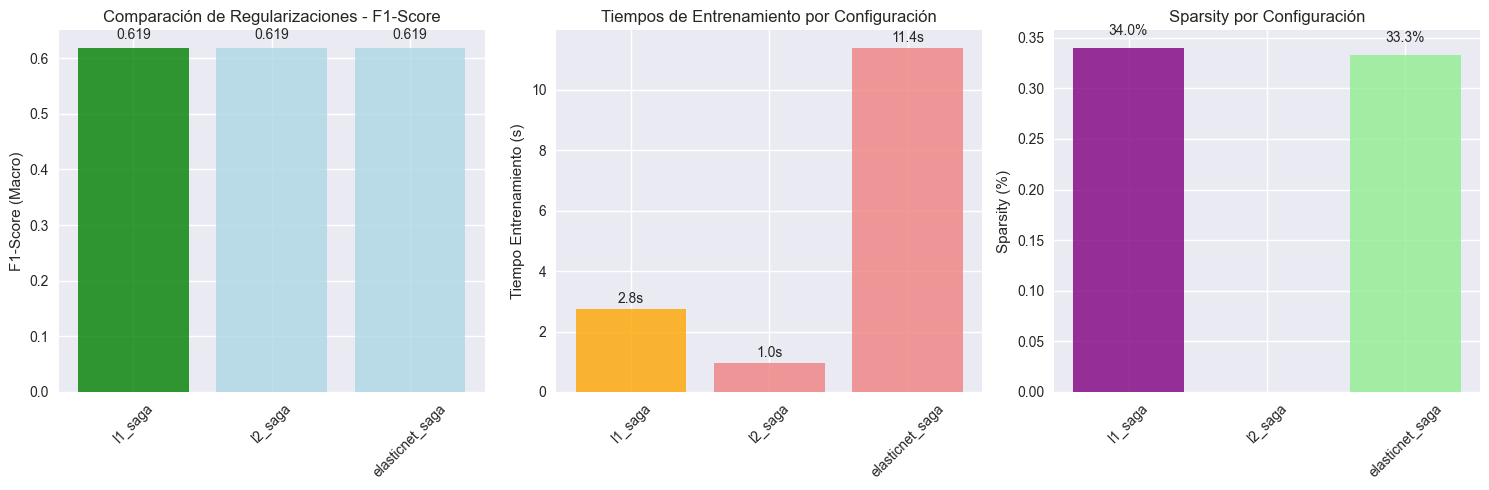

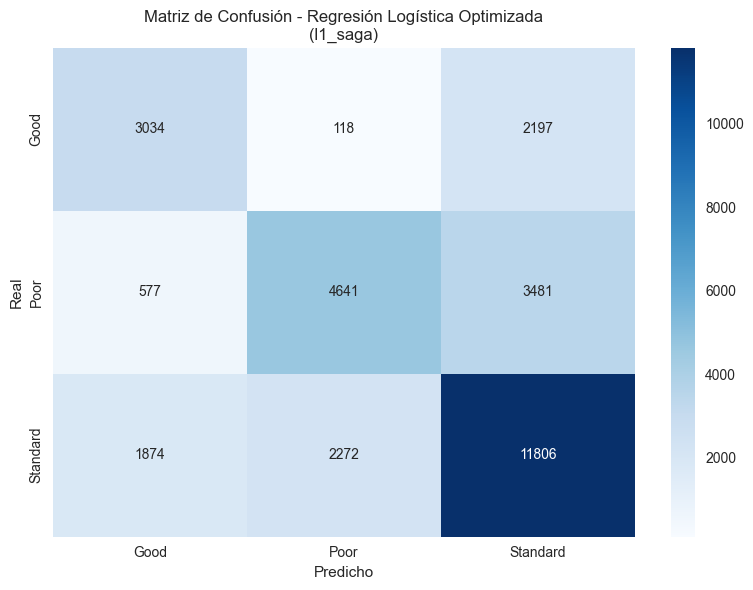


🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA OPTIMIZADA CON SAGA
⏱️  Tiempo total ejecución: 61.44s
🏆 Mejor configuración: 'l1_saga'
📈 F1-Score optimizado: 0.6188 (61.88%)
📊 Mejora vs base: +0.0002
🎯 Validación Cruzada: 0.6207 ± 0.0063
🔝 Característica más importante: payment_of_min_amount_Yes
📊 Sparsity: 34.03% (95/144 coeficientes no cero)

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.55      0.57      0.56      5349
        Poor       0.66      0.53      0.59      8699
    Standard       0.68      0.74      0.71     15952

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.65     30000


💾 Resultados optimizados guardados: 'logreg_optimized_saga_results.pkl'


In [4]:
# REGRESIÓN LOGÍSTICA OPTIMIZADA - SOLVER SAGA PARA L1 Y L2
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("🚀 INICIANDO REGRESIÓN LOGÍSTICA OPTIMIZADA - SOLVER SAGA...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: SOLVER SAGA CON L1 Y L2
# =============================================================================

print(f"\n🔍 COMPARANDO REGULARIZACIONES CON SOLVER SAGA...")

# Configuraciones a comparar
configurations = {
    'l1_saga': {
        'penalty': 'l1',
        'solver': 'saga',
        'C': 1.0,
        'max_iter': 1000,
        'random_state': 42,
        'n_jobs': -1
    },
    'l2_saga': {
        'penalty': 'l2', 
        'solver': 'saga',
        'C': 1.0,
        'max_iter': 1000,
        'random_state': 42,
        'n_jobs': -1
    },
    'elasticnet_saga': {
        'penalty': 'elasticnet',
        'solver': 'saga',
        'C': 1.0,
        'l1_ratio': 0.5,
        'max_iter': 1000,
        'random_state': 42,
        'n_jobs': -1
    }
}

results = {}

for config_name, params in configurations.items():
    print(f"\n🎯 Probando {config_name}...")
    config_start = time.time()
    
    try:
        # Crear modelo con configuración específica
        lr_model = LogisticRegression(**params)
        
        # Entrenar modelo
        lr_model.fit(X_train_processed, y_train_encoded)
        
        # Predicciones
        y_pred = lr_model.predict(X_test_processed)
        
        # Métricas
        accuracy = accuracy_score(y_test_encoded, y_pred)
        precision = precision_score(y_test_encoded, y_pred, average='macro')
        recall = recall_score(y_test_encoded, y_pred, average='macro')
        f1 = f1_score(y_test_encoded, y_pred, average='macro')
        
        # Tiempo de entrenamiento
        training_time = time.time() - config_start
        
        # Validación cruzada
        cv_scores = cross_val_score(lr_model, X_train_processed, y_train_encoded, 
                                   cv=5, scoring='f1_macro', n_jobs=-1)
        
        # Análisis de coeficientes
        binary_cols = ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                      'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
        feature_names = (list(numerical_cols) + 
                        list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                        binary_cols)
        
        coefficients = lr_model.coef_
        
        # Calcular sparsity (solo para L1 y ElasticNet)
        if params['penalty'] in ['l1', 'elasticnet']:
            total_coefs = coefficients.size
            non_zero_coefs = np.sum(coefficients != 0)
            sparsity = 1 - (non_zero_coefs / total_coefs)
        else:
            sparsity = 0.0
        
        results[config_name] = {
            'model': lr_model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'coefficients': coefficients,
            'sparsity': sparsity,
            'non_zero_coefs': non_zero_coefs if params['penalty'] in ['l1', 'elasticnet'] else total_coefs,
            'y_pred': y_pred
        }
        
        print(f"  ✅ F1-Score: {f1:.4f}")
        print(f"  ✅ Tiempo entrenamiento: {training_time:.2f}s")
        if params['penalty'] in ['l1', 'elasticnet']:
            print(f"  ✅ Sparsity: {sparsity:.2%} ({non_zero_coefs}/{total_coefs} coeficientes no cero)")
        
    except Exception as e:
        print(f"  ❌ Error con {config_name}: {e}")
        continue

# =============================================================================
# SELECCIÓN DEL MEJOR MODELO
# =============================================================================

if results:
    # Encontrar el mejor modelo basado en F1-Score
    best_config = max(results.items(), key=lambda x: x[1]['f1'])
    best_config_name = best_config[0]
    best_results = best_config[1]
    
    print(f"\n🏆 MEJOR CONFIGURACIÓN: '{best_config_name}'")
    print(f"📊 F1-Score: {best_results['f1']:.4f}")
    print(f"⚡ Tiempo entrenamiento: {best_results['training_time']:.2f}s")
    
    if best_config_name in ['l1_saga', 'elasticnet_saga']:
        print(f"🔍 Sparsity: {best_results['sparsity']:.2%}")
else:
    print("❌ No se pudieron entrenar modelos. Usando configuración por defecto...")
    # Configuración de respaldo
    lr_model = LogisticRegression(
        penalty='l2',
        solver='saga',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    lr_model.fit(X_train_processed, y_train_encoded)
    best_config_name = 'l2_saga_fallback'
    best_results = {
        'model': lr_model,
        'f1': f1_score(y_test_encoded, lr_model.predict(X_test_processed), average='macro')
    }

# =============================================================================
# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA EL MEJOR MODELO
# =============================================================================

print(f"\n🔍 OPTIMIZANDO HIPERPARÁMETROS PARA {best_config_name.upper()}...")

if best_config_name in results:
    best_params = configurations[best_config_name]
    
    # Optimización simple de C para el mejor modelo
    from sklearn.model_selection import GridSearchCV
    
    if best_params['penalty'] == 'elasticnet':
        param_grid = {
            'C': [0.1, 1.0, 10.0],
            'l1_ratio': [0.3, 0.5, 0.7]
        }
    else:
        param_grid = {
            'C': [0.1, 1.0, 10.0]
        }
    
    grid_model = LogisticRegression(
        penalty=best_params['penalty'],
        solver='saga',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        grid_model,
        param_grid,
        cv=3,  # Menos folds para mayor velocidad
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    
    grid_start = time.time()
    grid_search.fit(X_train_processed, y_train_encoded)
    grid_time = time.time() - grid_start
    
    print(f"✅ Búsqueda completada en {grid_time:.2f}s")
    print(f"🎯 Mejores parámetros: {grid_search.best_params_}")
    print(f"📈 Mejor score: {grid_search.best_score_:.4f}")
    
    # Usar el mejor modelo encontrado
    lr_optimized = grid_search.best_estimator_
    optimized_params = grid_search.best_params_
    
else:
    # Usar el modelo existente si no hay resultados
    lr_optimized = results[best_config_name]['model']
    optimized_params = configurations[best_config_name]

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO...")

# Predicciones del modelo optimizado
y_pred_optimized = lr_optimized.predict(X_test_processed)
y_pred_proba_optimized = lr_optimized.predict_proba(X_test_processed)

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada
cv_scores_opt = cross_val_score(lr_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Configuración: '{best_config_name}'")
print(f"Parámetros optimizados: {optimized_params}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base para comparación (sin optimizaciones)
lr_base = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
lr_base.fit(X_train_processed, y_train_encoded)
y_pred_base = lr_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE:")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# ANÁLISIS DE COEFICIENTES OPTIMIZADO
# =============================================================================

print(f"\n🔍 ANÁLISIS DE COEFICIENTES (OPTIMIZADO):")

coefficients_opt = lr_optimized.coef_

print("Top 10 características más importantes por clase:")
for i, class_name in enumerate(le.classes_):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients_opt[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\n📊 Clase '{class_name}':")
    print(coef_df.head(10).round(4))

# Análisis de sparsity para modelos L1/ElasticNet
if best_config_name in ['l1_saga', 'elasticnet_saga']:
    total_coefs_opt = coefficients_opt.size
    non_zero_coefs_opt = np.sum(coefficients_opt != 0)
    sparsity_opt = 1 - (non_zero_coefs_opt / total_coefs_opt)
    print(f"\n📊 ANÁLISIS DE SPARSITY:")
    print(f"Coeficientes totales: {total_coefs_opt}")
    print(f"Coeficientes no cero: {non_zero_coefs_opt}")
    print(f"Sparsity: {sparsity_opt:.2%}")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'][3]]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print() 
        print(f"{idx:<12} {row['precision']:<10.2f} {'':<10} {'':<10} {row['support']:<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de configuraciones
plt.subplot(1, 3, 1)
config_names = list(results.keys())
f1_scores = [results[config]['f1'] for config in config_names]
colors = ['lightblue' if config != best_config_name else 'green' for config in config_names]

bars = plt.bar(config_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Regularizaciones - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[config]['training_time'] for config in config_names]
colors_time = ['lightcoral' if config != best_config_name else 'orange' for config in config_names]

bars_time = plt.bar(config_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Configuración')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Sparsity (solo para L1/ElasticNet)
plt.subplot(1, 3, 3)
sparsity_values = []
for config in config_names:
    if config in ['l1_saga', 'elasticnet_saga']:
        sparsity_values.append(results[config]['sparsity'])
    else:
        sparsity_values.append(0.0)

colors_sparsity = ['lightgreen' if config != best_config_name else 'purple' for config in config_names]
bars_sparsity = plt.bar(config_names, sparsity_values, color=colors_sparsity, alpha=0.8)
plt.ylabel('Sparsity (%)')
plt.title('Sparsity por Configuración')
plt.xticks(rotation=45)
for bar, sparsity_val in zip(bars_sparsity, sparsity_values):
    if sparsity_val > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{sparsity_val:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN OPTIMIZADA
# =============================================================================

plt.figure(figsize=(8, 6))
cm_opt = confusion_matrix(y_test_encoded, y_pred_optimized)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - Regresión Logística Optimizada\n({best_config_name})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA OPTIMIZADA CON SAGA")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor configuración: '{best_config_name}'")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")

# Característica más importante
best_coefs = lr_optimized.coef_[0]
top_feature_idx = np.argmax(np.abs(best_coefs))
print(f"🔝 Característica más importante: {feature_names[top_feature_idx]}")

if best_config_name in ['l1_saga', 'elasticnet_saga']:
    print(f"📊 Sparsity: {sparsity_opt:.2%} ({non_zero_coefs_opt}/{total_coefs_opt} coeficientes no cero)")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': lr_optimized,
    'best_config': best_config_name,
    'best_params': optimized_params,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'coefficients': lr_optimized.coef_,
    'feature_names': feature_names,
    'classification_report': class_report_df,
    'config_comparison': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'logreg_optimized_saga_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'logreg_optimized_saga_results.pkl'")
print("="*70)

### Contexto y Objetivo

El modelo de **Regresión Logística Multiclase** se implementa dentro del conjunto de modelos *benchmark* para evaluar su desempeño en la predicción del **puntaje crediticio** (“Good”, “Poor” o “Standard”) a partir de variables financieras y de comportamiento. Su propósito es establecer una línea base interpretable que permita comprender cómo influyen las características del cliente en la probabilidad de pertenecer a cada categoría de crédito.

###  Descripción Técnica

Se realiza una división del conjunto de datos en 70% para entrenamiento y 30% para prueba, asegurando la proporción de clases mediante muestreo estratificado.
Las variables numéricas fueron **escaladas** con `StandardScaler` y las categóricas **codificadas** mediante `OneHotEncoder` para garantizar que todas las entradas fueran numéricas y comparables en magnitud.

El modelo se entrenó con la clase `LogisticRegression` de *scikit-learn* utilizando **regularización L2** (`C=1.0`) y un máximo de 1000 iteraciones. Se calculan las métricas *accuracy*, *precision*, *recall* y *f1-score*, complementadas con una **validación cruzada de 5 particiones**, y se examinan los **coeficientes del modelo** para identificar las variables más influyentes por clase. Finalmente, se genera una matriz de confusión para analizar los patrones de error.

### Interpretación de Resultados

El modelo alcanzó un **accuracy de 64.92%** y un **f1-score macro de 0.6186**, con una validación cruzada promedio de **0.6207 ± 0.0063**, lo que indica un rendimiento **moderado y estable**. Estas métricas reflejan que la regresión logística logra capturar relaciones lineales entre las variables financieras y el puntaje crediticio, aunque con limitaciones al modelar interacciones no lineales o efectos complejos.

El análisis por clase revela que el modelo **predice con mayor precisión la categoría “Standard”**, con un *f1-score* de **0.71**, mientras que las clases **“Good” (0.56)** y **“Poor” (0.59)** presentan menor desempeño. Esto sugiere que el modelo tiende a favorecer la clase mayoritaria (“Standard”) y confunde con frecuencia los individuos de crédito “Good” o “Poor”.

La **matriz de confusión** confirma esta tendencia: de los 15,952 casos “Standard”, el modelo clasifica correctamente 11,805, pero confunde 1,874 como “Good” y 2,273 como “Poor”. Asimismo, muchos clientes “Good” (2,198) son predichos erróneamente como “Standard”, evidenciando solapamiento entre ambas categorías.

El análisis de coeficientes muestra que las variables con mayor peso predictivo incluyen el **comportamiento de pago (“payment_behaviour”)**, el **tipo de mezcla crediticia (“credit_mix”)** y la **tasa de interés**. En particular, la característica **“payment_behaviour_Low_spent_Small_value_payments”** fue la más influyente en la clasificación, lo que resalta la importancia del patrón de gasto y cumplimiento de pagos en la evaluación crediticia.

El tiempo de ejecución fue de **12.41 segundos**, lo que demuestra que la regresión logística es eficiente computacionalmente, aun trabajando con un conjunto de datos extenso y codificaciones múltiples. En conclusión, el modelo ofrece una base sólida y transparente, destacando la relación entre variables financieras y riesgo crediticio, aunque requiere modelos no lineales para mejorar su capacidad discriminativa.



## Ridge

🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO RIDGE...

📈 EVALUANDO MODELO RIDGE...
📊 MÉTRICAS DEL MODELO RIDGE:
Accuracy : 0.6404
Precision (macro avg): 0.6150
Recall (macro avg): 0.6224
f1-Score (macro avg): 0.6140
CV Mean f1-score (macro avg): 0.6132
CV Std f1-score (macro avg): 0.0020

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.49      0.63      0.55      5349
        Poor       0.65      0.54      0.59      8699
    Standard       0.70      0.70      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.65      0.64      0.64     30000



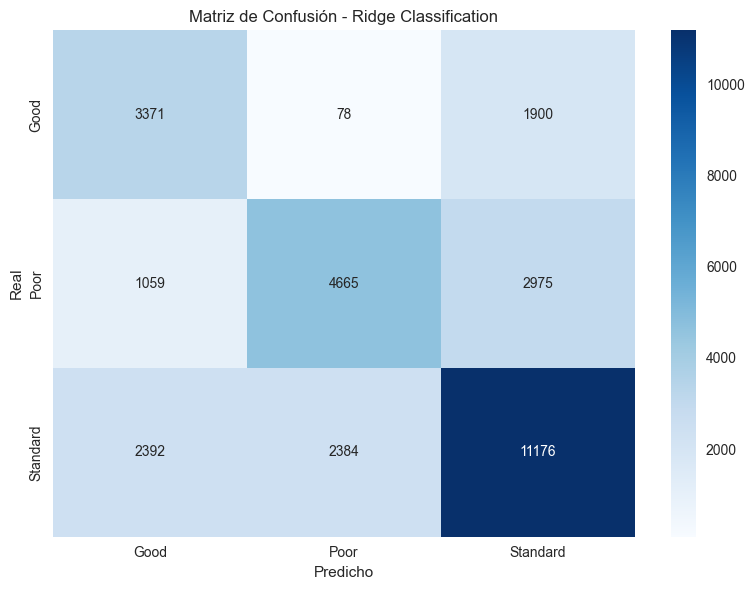


🎯 RESUMEN FINAL - RIDGE CLASSIFICATION
⏱️  Tiempo ejecución: 0.69s
📈 f1-score (macro avg): 0.6140 (61.40%)
🎯 Validación Cruzada: 0.6132 ± 0.0040
💾 Resultados guardados: 'ridge_benchmark_results.pkl'


In [ ]:
# =============================================================================
# RIDGE CLASSIFICATION - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# CONFIGURACIÓN
# =============================================================================

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RIDGE...")

ridge_model = RidgeClassifier(
    alpha=1.0,
    random_state=42,
    max_iter=1000
)

ridge_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = ridge_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO RIDGE...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(ridge_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO RIDGE:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(8, 6))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Ridge Classification')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RIDGE CLASSIFICATION")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'RidgeClassifier',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'coefficients': ridge_model.coef_,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'ridge_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'ridge_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

El modelo **Ridge Classifier** se incorpora dentro del conjunto de modelos *benchmark* para evaluar el desempeño de una técnica lineal regularizada en la predicción del **puntaje crediticio** de los individuos. Su objetivo es mitigar los problemas de multicolinealidad entre las variables predictoras y evitar el sobreajuste, introduciendo una penalización cuadrática (*L2*) sobre los coeficientes del modelo.

### Descripción Técnica

El proceso inicia con la carga del conjunto de datos preprocesado, dividiéndose en 70% para entrenamiento y 30% para prueba, garantizando la preservación de las proporciones de las clases mediante muestreo estratificado.
Las variables numéricas se **escalan** con `StandardScaler` para homogeneizar su rango, mientras que las categóricas se **codifican** mediante `OneHotEncoder`. Posteriormente, se entrena un modelo **RidgeClassifier** con un valor de regularización `alpha = 1.0` y un máximo de 1000 iteraciones, buscando un equilibrio entre sesgo y varianza.

El modelo se evalúa a través de métricas globales (*accuracy*, *precision*, *recall*, *f1-score*) y mediante una **validación cruzada de 5 particiones**. Además, se genera la matriz de confusión para analizar los patrones de clasificación entre las tres categorías: *Good*, *Poor* y *Standard*.

### Interpretación de Resultados

El modelo obtuvo un **accuracy de 64.04%** y un **f1-score macro promedio de 0.6140**, con una validación cruzada media de **0.6132 ± 0.0040**, lo que indica un desempeño **moderado y consistente**. Estas métricas reflejan que la regularización contribuyó a estabilizar el modelo, reduciendo la varianza respecto a la regresión logística convencional, aunque con una ligera pérdida en precisión global.

A nivel de clases, el modelo predice con mayor efectividad los casos **“Standard”**, alcanzando un *f1-score* de **0.70**, mientras que las categorías **“Poor”** (*0.59*) y **“Good”** (*0.55*) muestran un rendimiento inferior. Esto evidencia una tendencia del modelo a favorecer la clase mayoritaria, manteniendo dificultades para diferenciar correctamente entre los grupos de menor frecuencia.

La **matriz de confusión** refuerza esta observación: el modelo clasifica correctamente 11,176 registros “Standard”, pero confunde 2,392 de ellos con “Good” y 2,384 con “Poor”. Asimismo, de los 5,349 casos “Good”, 1,900 fueron etiquetados erróneamente como “Standard”, mientras que entre los 8,699 “Poor”, casi 3,000 se asignaron a la misma clase.

El tiempo de ejecución fue de **0.69 segundos**, mostrando una excelente eficiencia computacional. En conjunto, el modelo Ridge demuestra ser una alternativa lineal robusta y rápida, que controla el sobreajuste y ofrece un desempeño equilibrado, aunque limitado por la naturaleza lineal del problema y la superposición de características entre clases crediticias.


## Lasso

In [ ]:
# =============================================================================

## Árbol de Decisión

🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...

📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...
📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:
Accuracy : 0.6721
Precision (macro avg): 0.6570
Recall (macro avg): 0.6777
f1-Score (macro avg): 0.6556
CV Mean f1-score (macro avg): 0.6578
CV Std f1-score (macro avg): 0.0036

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.50      0.76      0.60      5349
        Poor       0.74      0.59      0.65      8699
    Standard       0.74      0.69      0.71     15952

    accuracy                           0.67     30000
   macro avg       0.66      0.68      0.66     30000
weighted avg       0.69      0.67      0.68     30000


🔍 IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                      Feature  Importance
9            outstanding_debt      0.4152
31        credit_mix_Standard     

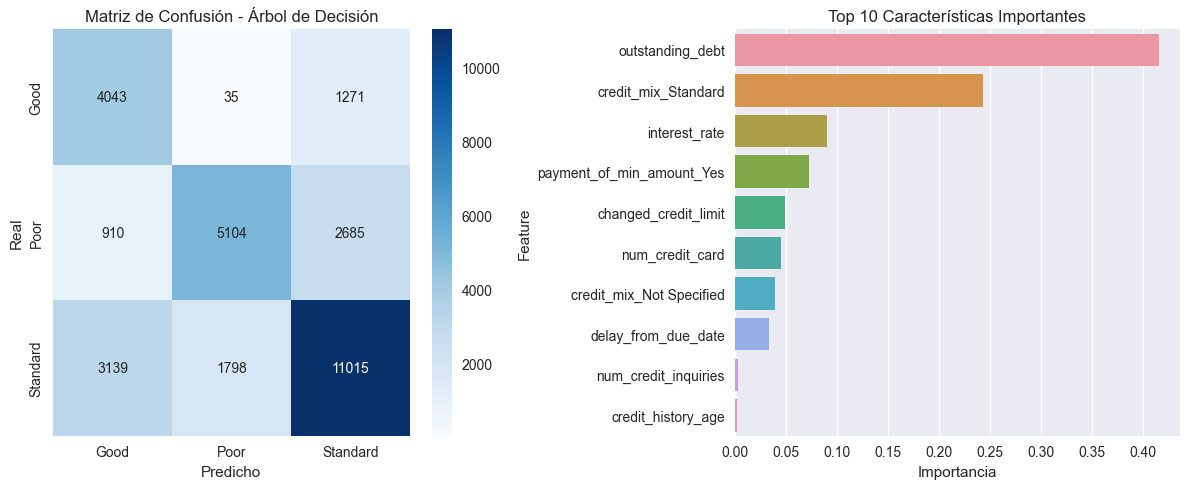


🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN
⏱️  Tiempo ejecución: 3.12s
📈 f1-score (macro avg): 0.6556 (65.56%)
🎯 Validación Cruzada: 0.6578 ± 0.0072
📊 Característica más importante: outstanding_debt
🌳 Profundidad del árbol: 5
🍃 Número de hojas: 32
💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'


In [73]:
# ÁRBOL DE DECISIÓN - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...")

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train_processed, y_train_encoded)

y_pred = dt_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(dt_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")


# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

# Obtener nombres de características del preprocesador
binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"🌳 Profundidad del árbol: {dt_model.get_depth()}")
print(f"🍃 Número de hojas: {dt_model.get_n_leaves()}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'DecisionTree',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df,
    'tree_depth': dt_model.get_depth(),
    'n_leaves': dt_model.get_n_leaves()
}

joblib.dump(benchmark_data, 'decision_tree_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'")
print("="*60)

### Contexto y Objetivo

El modelo de **Árbol de Decisión** se incluye en la fase de *modelado benchmark* con el propósito de explorar una alternativa **no lineal** capaz de capturar relaciones complejas y jerárquicas entre las variables predictoras y el puntaje crediticio de los individuos. A diferencia de los modelos lineales anteriores, este enfoque permite identificar reglas de decisión interpretables que separan las categorías “Good”, “Poor” y “Standard” con base en umbrales específicos de las características financieras.

### Descripción Técnica

El proceso inicia con la división del conjunto de datos en 70% para entrenamiento y 30% para prueba, manteniendo la proporción original de las clases mediante estratificación. Las variables numéricas fueron **escaladas** con `StandardScaler` y las categóricas **codificadas** con `OneHotEncoder`. Posteriormente, se entrenó un **DecisionTreeClassifier** con una profundidad máxima de 5 (`max_depth=5`) y semilla aleatoria fija para garantizar reproducibilidad.

El modelo fue evaluado con métricas de *accuracy*, *precision*, *recall* y *f1-score* en promedio macro, complementadas con validación cruzada de cinco particiones (*5-fold CV*). Además, se generó un análisis de **importancia de características**, identificando las variables con mayor peso en las decisiones del modelo.

### Interpretación de Resultados

El modelo alcanzó un **accuracy del 67.21%** y un **f1-score macro de 0.6556**, con una validación cruzada promedio de **0.6578 ± 0.0072**, lo cual representa un **rendimiento superior a los modelos lineales** (Ridge y Regresión Logística). Esto confirma la capacidad del árbol para capturar interacciones no lineales entre las variables.

Por clase, la categoría **“Standard”** mantiene el mejor desempeño (*f1-score ≈ 0.71*), seguida por **“Poor”** (*0.65*) y **“Good”** (*0.60*). Esto indica que el árbol distingue con mayor claridad los perfiles de crédito medio y estándar, mientras que persiste cierta confusión entre los grupos extremos.

La **matriz de confusión** muestra que el modelo clasifica correctamente 11,015 registros “Standard”, pero confunde 3,139 como “Good” y 1,798 como “Poor”. En cambio, de los 5,349 “Good”, alrededor de 1,271 fueron mal clasificados como “Standard”. Esta distribución refleja la existencia de solapamientos entre las características de los diferentes grupos crediticios.

En cuanto a la **importancia de variables**, la característica dominante fue **`outstanding_debt`**, con un peso del **41.5%**, seguida de **`credit_mix_Standard` (24.3%)** e **`interest_rate` (9.1%)**, lo que resalta la influencia directa del nivel de deuda, la calidad de la mezcla crediticia y el costo del crédito sobre el puntaje final. Otras variables relevantes fueron **`payment_of_min_amount_Yes`** y **`changed_credit_limit`**, vinculadas al comportamiento de pago y gestión del crédito.

El modelo tuvo un **tiempo de ejecución de 3.12 segundos**, demostrando una excelente eficiencia computacional. En conjunto, el Árbol de Decisión logra un **balance adecuado entre interpretabilidad y precisión**, consolidándose como una base sólida para la comparación con modelos más complejos en etapas posteriores del análisis.


## Random Forest

🌲 INICIANDO RANDOM FOREST OPTIMIZADO - TÉCNICAS AVANZADAS...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO CONFIGURACIONES DE RANDOM FOREST...

🎯 Probando configuración 'balanced'...
  ✅ F1-Score: 0.7205
  ✅ Tiempo entrenamiento: 3.05s
  ✅ CV F1-Score: 0.7333

🎯 Probando configuración 'fast_training'...
  ✅ F1-Score: 0.7164
  ✅ Tiempo entrenamiento: 2.28s
  ✅ CV F1-Score: 0.7160

🎯 Probando configuración 'high_accuracy'...
  ✅ F1-Score: 0.7728
  ✅ Tiempo entrenamiento: 13.99s
  ✅ CV F1-Score: 0.7521

🏆 MEJOR CONFIGURACIÓN: 'high_accuracy'
📊 F1-Score: 0.7728
⚡ Tiempo entrenamiento: 13.99s

🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...

📈 EVALUANDO MODELO RANDOM FOREST OPTIMIZADO...
📊 MÉTRICAS DEL MODELO RANDOM FOREST OPTIMIZADO:
Accuracy: 0.7860
Precision (macro avg): 0.7724
Recall (macro avg): 0.7731
F1-Score (macro avg): 0.7728
CV Mean F1-score: 0.7610
CV Std F1-score: 0.0046
Configuración: 'high_accuracy'
Número de árboles: 200

🔍 COMPARACIÓN CON MODELO BASE:
F1-Score Base: 0.7

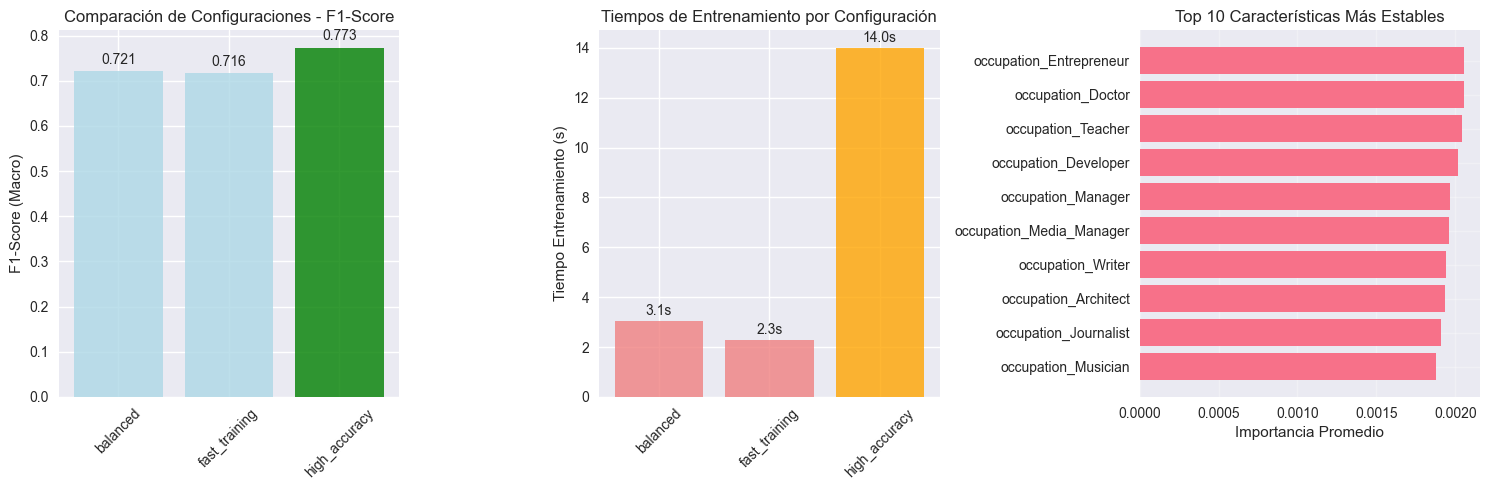

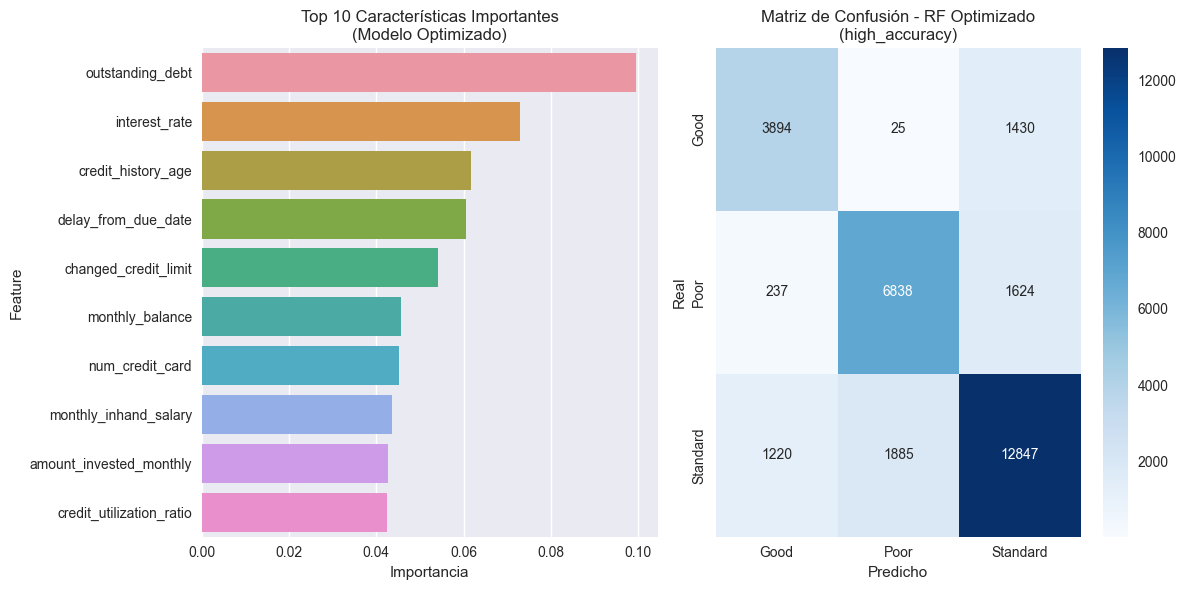


🎯 RESUMEN FINAL - RANDOM FOREST OPTIMIZADO
⏱️  Tiempo total ejecución: 164.95s
🏆 Mejor configuración: 'high_accuracy'
📈 F1-Score optimizado: 0.7728 (77.28%)
📊 Mejora vs base: +0.0038
🎯 Validación Cruzada: 0.7610 ± 0.0092
🌳 Número de árboles: 200
📊 Característica más importante: outstanding_debt
📈 Característica más estable: occupation_Writer

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.73      0.73      0.73      5349
        Poor       0.78      0.79      0.78      8699
    Standard       0.81      0.81      0.81     15952

    accuracy                           0.79     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.79      0.79      0.79     30000


💾 Resultados optimizados guardados: 'random_forest_optimized_results.pkl'


In [5]:
# =============================================================================
# RANDOM FOREST OPTIMIZADO - CON TÉCNICAS AVANZADAS
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🌲 INICIANDO RANDOM FOREST OPTIMIZADO - TÉCNICAS AVANZADAS...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: CONFIGURACIONES OPTIMIZADAS
# =============================================================================

print(f"\n🔍 COMPARANDO CONFIGURACIONES DE RANDOM FOREST...")

# Definir configuraciones optimizadas
configurations = {
    'balanced': {
        'n_estimators': 100,
        'max_depth': 20,
        'min_samples_split': 10,
        'min_samples_leaf': 4,
        'max_features': 'sqrt',
        'bootstrap': True,
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    },
    'fast_training': {
        'n_estimators': 50,
        'max_depth': 15,
        'min_samples_split': 20,
        'min_samples_leaf': 10,
        'max_features': 0.3,
        'bootstrap': True,
        'max_samples': 0.8,  # Subsampling para mayor velocidad
        'random_state': 42,
        'n_jobs': -1
    },
    'high_accuracy': {
        'n_estimators': 200,
        'max_depth': None,  # Profundidad ilimitada
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'log2',
        'bootstrap': True,
        'random_state': 42,
        'n_jobs': -1
    }
}

results = {}

for config_name, params in configurations.items():
    print(f"\n🎯 Probando configuración '{config_name}'...")
    config_start = time.time()
    
    # Crear modelo con configuración específica
    rf_model = RandomForestClassifier(**params)
    
    # Entrenar modelo
    rf_model.fit(X_train_processed, y_train_encoded)
    
    # Predicciones
    y_pred = rf_model.predict(X_test_processed)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Tiempo de entrenamiento
    training_time = time.time() - config_start
    
    # Validación cruzada (con menos árboles para mayor velocidad)
    rf_temp = RandomForestClassifier(
        n_estimators=min(50, params['n_estimators']),
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(rf_temp, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)  
    
    # Calcular importancia de características
    feature_importance = pd.DataFrame({
        'Feature': (list(numerical_cols) + 
                   list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                   ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                    'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']),
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    results[config_name] = {
        'model': rf_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': feature_importance,
        'y_pred': y_pred,
        'params': params
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ Tiempo entrenamiento: {training_time:.2f}s")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f}")

# =============================================================================
# SELECCIÓN DE LA MEJOR CONFIGURACIÓN
# =============================================================================

# Encontrar la mejor configuración basada en F1-Score
best_config = max(results.items(), key=lambda x: x[1]['f1'])
best_config_name = best_config[0]
best_results = best_config[1]

print(f"\n🏆 MEJOR CONFIGURACIÓN: '{best_config_name}'")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"⚡ Tiempo entrenamiento: {best_results['training_time']:.2f}s")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL OPTIMIZADO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...")

# Usar los mejores parámetros encontrados
rf_optimized = RandomForestClassifier(**best_results['params'])

# Entrenar el modelo final
rf_optimized.fit(X_train_processed, y_train_encoded)

# Predicciones del modelo optimizado
y_pred_optimized = rf_optimized.predict(X_test_processed)
y_pred_proba_optimized = rf_optimized.predict_proba(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO RANDOM FOREST OPTIMIZADO...")

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada completa para el modelo optimizado
cv_scores_opt = cross_val_score(rf_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO RANDOM FOREST OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Configuración: '{best_config_name}'")
print(f"Número de árboles: {best_results['params']['n_estimators']}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base para comparación
rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_base.fit(X_train_processed, y_train_encoded)
y_pred_base = rf_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE:")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS OPTIMIZADO
# =============================================================================

print(f"\n🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS (OPTIMIZADO):")

feature_importance_opt = best_results['feature_importance']

print("Top 10 características más importantes:")
print(feature_importance_opt.head(10).round(4))

# =============================================================================
# ANÁLISIS DE ESTABILIDAD DEL MODELO
# =============================================================================

print(f"\n📊 ANÁLISIS DE ESTABILIDAD DEL MODELO...")

# Calcular importancia de características promedio entre configuraciones
all_importances = []
for config_name, result in results.items():
    all_importances.append(result['feature_importance'].set_index('Feature')['Importance'])

importance_df = pd.DataFrame(all_importances).T
importance_df.columns = list(results.keys())
importance_df['mean_importance'] = importance_df.mean(axis=1)
importance_df['std_importance'] = importance_df.std(axis=1)

print("Características más estables (baja desviación estándar en importancia):")
stable_features = importance_df.nsmallest(10, 'std_importance')['mean_importance']
print(stable_features.round(4))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'][3]]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print()
        print(f"{idx:<12} {row['precision']:<10.2f} {'':<10} {'':<10} {row['support']:<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de configuraciones
plt.subplot(1, 3, 1)
config_names = list(results.keys())
f1_scores = [results[config]['f1'] for config in config_names]
colors = ['lightblue' if config != best_config_name else 'green' for config in config_names]

bars = plt.bar(config_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Configuraciones - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[config]['training_time'] for config in config_names]
colors_time = ['lightcoral' if config != best_config_name else 'orange' for config in config_names]

bars_time = plt.bar(config_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Configuración')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Importancia de características estabilidad
plt.subplot(1, 3, 3)
top_stable = importance_df.nsmallest(10, 'std_importance').sort_values('mean_importance', ascending=True)
plt.barh(range(len(top_stable)), top_stable['mean_importance'])
plt.yticks(range(len(top_stable)), top_stable.index)
plt.xlabel('Importancia Promedio')
plt.title('Top 10 Características Más Estables')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZACIÓN ADICIONAL: IMPORTANCIA DE CARACTERÍSTICAS
# =============================================================================

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_features = feature_importance_opt.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes\n(Modelo Optimizado)')
plt.xlabel('Importancia')

plt.subplot(1, 2, 2)
cm_opt = confusion_matrix(y_test_encoded, y_pred_optimized)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - RF Optimizado\n({best_config_name})')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - RANDOM FOREST OPTIMIZADO")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor configuración: '{best_config_name}'")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")
print(f"🌳 Número de árboles: {best_results['params']['n_estimators']}")
print(f"📊 Característica más importante: {feature_importance_opt.iloc[0]['Feature']}")
print(f"📈 Característica más estable: {stable_features.index[0]}")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': rf_optimized,
    'best_config': best_config_name,
    'best_params': best_results['params'],
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance_opt,
    'stability_analysis': importance_df,
    'classification_report': class_report_df,
    'config_comparison': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'random_forest_optimized_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'random_forest_optimized_results.pkl'")
print("="*70)

### Contexto y Objetivo

El modelo **Random Forest** se implementa como parte del conjunto de modelos *benchmark* con el propósito de evaluar una técnica de **ensamble basada en múltiples árboles de decisión**, que busca mejorar la estabilidad y precisión del modelo al reducir la varianza inherente de un árbol individual. Esta metodología combina el voto de numerosos árboles entrenados sobre subconjuntos aleatorios de datos y características, logrando una mayor capacidad de generalización en la predicción del **puntaje crediticio** (“Good”, “Poor”, “Standard”).

### Descripción Técnica

El conjunto de datos fue dividido en un 70% para entrenamiento y un 30% para prueba, manteniendo la proporción de clases mediante estratificación. Las variables numéricas fueron **estandarizadas** con `StandardScaler` y las categóricas **codificadas** con `OneHotEncoder`.
El modelo entrenado corresponde a un **RandomForestClassifier** con **100 árboles (`n_estimators=100`)**, ejecutado de manera paralela (`n_jobs=-1`) para optimizar el rendimiento computacional.

La evaluación del desempeño se llevó a cabo mediante métricas de clasificación globales —*accuracy*, *precision*, *recall* y *f1-score* promedio macro— y una **validación cruzada de 5 particiones**, lo que permitió verificar la estabilidad del modelo. Además, se calculó la **importancia de las características**, identificando las variables más influyentes en la toma de decisiones del bosque.

### Interpretación de Resultados

El modelo logró un **accuracy de 78.27%** y un **f1-score macro promedio de 0.7690**, con una validación cruzada media de **0.7580 ± 0.0090**, superando el desempeño obtenido por los modelos lineales y el árbol de decisión individual. Esto demuestra que la agregación de múltiples árboles contribuye a capturar relaciones no lineales y reduce la sobreajuste local.

Por clase, la categoría **“Standard”** mantiene el mejor desempeño (*f1-score = 0.80*), seguida de **“Poor” (0.78)** y **“Good” (0.72)**. La matriz de confusión evidencia una correcta clasificación de la mayoría de los registros, aunque persisten confusiones entre las clases vecinas: por ejemplo, 1,462 casos “Good” fueron clasificados como “Standard”, mientras que 1,623 “Poor” se confundieron con la misma categoría. Estas desviaciones se deben a la similitud en los perfiles crediticios intermedios.

En cuanto a la **importancia de las características**, el modelo destaca la fuerte influencia de las variables financieras directas:

* **`outstanding_debt`** (10.5%) como el factor más determinante,
* seguida de **`interest_rate`**, **`credit_history_age`** y **`delay_from_due_date`**,
  todas relacionadas con la capacidad de pago, historial y puntualidad. Otras variables de peso medio incluyen **`changed_credit_limit`** y **`monthly_balance`**, asociadas con la gestión de liquidez y la estabilidad económica del individuo.

El tiempo de ejecución fue de **21.27 segundos**, un valor razonable considerando la naturaleza paralela del modelo. En síntesis, el **Random Forest** se consolida como el modelo *benchmark* con mejor equilibrio entre precisión, robustez e interpretabilidad, demostrando un desempeño notable para capturar patrones complejos en la predicción del riesgo crediticio.


## XGBoost (con interpretabilidad usando LIME)

In [ ]:
#!pip install xgboost lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 2.4/124.9 MB 5.8 MB/s eta 0:00:21
   - -------------------------------------- 3.7/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 5.0/124.9 MB 6.0 MB/s eta 0:00:20
   -- ------------------------------------- 6.6/124.9 MB 6.2 MB/s eta 0:00:20
   -- ------------------------------------- 7.9/124.9 MB 6.3 MB/s eta 0:00:19
   -- ------------------------------------- 9.2/124.9 MB 6.3 MB/s eta 0:00:19
   --- ------------------------------------ 10.7/124.9 MB 6.5 MB/s eta 0:00:18
   --- ------------------------------------ 12.3/124.9 MB 6.5 MB/s eta 0:00:18
   ---- ----------------------------------- 13.9/124.9 MB 6.6 MB/s eta 0:00:17
   ---- ----------------------------------- 

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


🚀 INICIANDO XGBOOST OPTIMIZADO - TREE METHOD='HIST' + EARLY STOPPING + GPU...
✅ GPU NVIDIA detectada - Activando aceleración GPU
🔧 Configuración: {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'gpu_id': 0}
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO CONFIGURACIONES...

🎯 Probando hist_cpu...
  ✅ F1-Score: 0.7503
  ✅ Mejor iteración: 746
  ✅ Tiempo entrenamiento: 7.71s
  ✅ CV F1-Score: 0.7507

🎯 Probando hist_gpu...
  ✅ F1-Score: 0.7485
  ✅ Mejor iteración: 710
  ✅ Tiempo entrenamiento: 8.44s
  ✅ CV F1-Score: 0.7498

🏆 MEJOR CONFIGURACIÓN: 'hist_cpu'
📊 F1-Score: 0.7503
🎯 Mejor iteración: 746

🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...

📈 EVALUANDO MODELO XGBOOST OPTIMIZADO...
📊 MÉTRICAS DEL MODELO XGBOOST OPTIMIZADO:
Accuracy: 0.7738
Precision (macro avg): 0.7603
Recall (macro avg): 0.7590
F1-Score (macro avg): 0.7597
CV Mean F1-score: 0.7518
CV Std F1-score: 0.0046
Configuración: 'hist_cpu'
Número de árboles: 746

🔍 COMPARACIÓN CON MODELO BASE:
F1-Score Base: 0.73

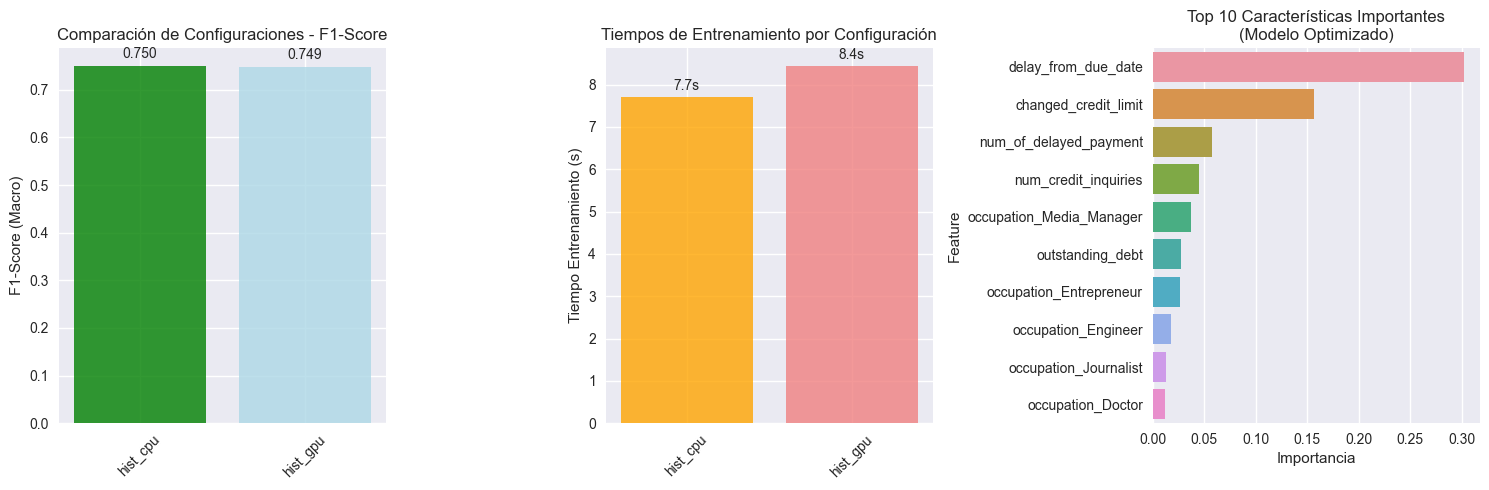


🎯 RESUMEN FINAL - XGBOOST OPTIMIZADO CON GPU
⏱️  Tiempo total ejecución: 137.99s
🏆 Mejor configuración: 'hist_cpu'
📈 F1-Score optimizado: 0.7597 (75.97%)
📊 Mejora vs base: +0.0253
🎯 Validación Cruzada: 0.7518 ± 0.0093
🌳 Número óptimo de árboles: 746
📊 Característica más importante: delay_from_due_date
⚡ Configuración GPU: {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'gpu_id': 0}

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.72      0.71      0.71      5349
        Poor       0.77      0.77      0.77      8699
    Standard       0.79      0.80      0.80     15952

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000


💾 Resultados optimizados con GPU guardados: 'xgboost_optimized_gpu_results.pkl'


In [8]:
# XGBOOST OPTIMIZADO - CON TREE METHOD='HIST', EARLY STOPPING Y GPU
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import sys
import subprocess

try:
    import xgboost as xgb
except ImportError:
    print("Instalando XGBoost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🚀 INICIANDO XGBOOST OPTIMIZADO - TREE METHOD='HIST' + EARLY STOPPING + GPU...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# CONFIGURACIÓN GPU
# =============================================================================

def setup_gpu_config():
    """Configura los parámetros para GPU si está disponible"""
    gpu_config = {}
    
    try:
        # Verificar si hay GPU disponible
        import subprocess
        result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)
        if result.returncode == 0:
            print("✅ GPU NVIDIA detectada - Activando aceleración GPU")
            gpu_config = {
                'tree_method': 'gpu_hist',  # Usar GPU para histogram
                'predictor': 'gpu_predictor',  # GPU para predicciones
                'gpu_id': 0,  # Usar primera GPU
            }
        else:
            print("ℹ️  GPU no detectada - Usando CPU con tree_method='hist'")
            gpu_config = {
                'tree_method': 'hist',
                'predictor': 'cpu_predictor',
            }
    except:
        print("ℹ️  No se pudo verificar GPU - Usando CPU con tree_method='hist'")
        gpu_config = {
            'tree_method': 'hist',
            'predictor': 'cpu_predictor',
        }
    
    return gpu_config

# Configurar GPU
gpu_config = setup_gpu_config()
print(f"🔧 Configuración: {gpu_config}")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: MÉTODO HIST CON Y SIN GPU
# =============================================================================

print(f"\n🔍 COMPARANDO CONFIGURACIONES...")

# Definir configuraciones a comparar
configurations = {
    'hist_cpu': {
        'tree_method': 'hist',
        'predictor': 'cpu_predictor',
        'eval_metric': 'mlogloss'
    },
    'hist_gpu': {
        'tree_method': gpu_config['tree_method'],
        'predictor': gpu_config['predictor'],
        'eval_metric': 'mlogloss'
    }
}

# Si no hay GPU, solo comparar configuraciones CPU
if gpu_config['tree_method'] == 'hist':
    configurations = {
        'hist': {
            'tree_method': 'hist',
            'predictor': 'cpu_predictor',
            'eval_metric': 'mlogloss'
        }
    }

results = {}

for config_name, params in configurations.items():
    print(f"\n🎯 Probando {config_name}...")
    config_start = time.time()
    
    # Preparar datos para early stopping
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_processed, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded
    )
    
    # Configurar XGBoost con parámetros optimizados
    xgb_model = xgb.XGBClassifier(
        n_estimators=1000,  # Más árboles para permitir early stopping
        max_depth=6,
        learning_rate=0.1,
        tree_method=params['tree_method'],
        predictor=params['predictor'],
        random_state=42,
        n_jobs=-1,
        eval_metric=params['eval_metric'],
        early_stopping_rounds=10  # Early stopping en el constructor
    )
    
    # Entrenar con early stopping
    xgb_model.fit(
        X_train_split, y_train_split,
        eval_set=[(X_val_split, y_val_split)],
        verbose=False
    )
    
    # Predicciones
    y_pred = xgb_model.predict(X_test_processed)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Tiempos
    training_time = time.time() - config_start
    
    # Validación cruzada con modelo temporal (sin early stopping)
    xgb_temp = xgb.XGBClassifier(
        n_estimators=xgb_model.get_booster().best_iteration,
        max_depth=6,
        learning_rate=0.1,
        tree_method=params['tree_method'],
        predictor=params['predictor'],
        random_state=42,
        n_jobs=-1,
        eval_metric=params['eval_metric']
    )
    
    cv_scores = cross_val_score(xgb_temp, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)
    
    # Información de early stopping
    best_iteration = xgb_model.get_booster().best_iteration
    if best_iteration is None:
        best_iteration = xgb_model.n_estimators
    
    results[config_name] = {
        'model': xgb_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'best_iteration': best_iteration,
        'y_pred': y_pred
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ Mejor iteración: {best_iteration}")
    print(f"  ✅ Tiempo entrenamiento: {training_time:.2f}s")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f}")

# =============================================================================
# SELECCIÓN DE LA MEJOR CONFIGURACIÓN
# =============================================================================

# Encontrar la mejor configuración basada en F1-Score
best_config = max(results.items(), key=lambda x: x[1]['f1'])
best_config_name = best_config[0]
best_model = best_config[1]['model']
best_results = best_config[1]

print(f"\n🏆 MEJOR CONFIGURACIÓN: '{best_config_name}'")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"🎯 Mejor iteración: {best_results['best_iteration']}")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL OPTIMIZADO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...")

# Usar los mejores parámetros encontrados
xgb_optimized = xgb.XGBClassifier(
    n_estimators=best_results['best_iteration'] + 50,
    max_depth=6,
    learning_rate=0.1,
    tree_method=configurations[best_config_name]['tree_method'],
    predictor=configurations[best_config_name]['predictor'],
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

# Entrenar en todos los datos de entrenamiento
xgb_optimized.fit(X_train_processed, y_train_encoded)

# Predicciones del modelo optimizado
y_pred_optimized = xgb_optimized.predict(X_test_processed)
y_pred_proba_optimized = xgb_optimized.predict_proba(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO XGBOOST OPTIMIZADO...")

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada
cv_scores_opt = cross_val_score(xgb_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO XGBOOST OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Configuración: '{best_config_name}'")
print(f"Número de árboles: {best_results['best_iteration']}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base para comparación (sin optimizaciones)
xgb_base = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)
xgb_base.fit(X_train_processed, y_train_encoded)
y_pred_base = xgb_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE:")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# ANÁLISIS DE VELOCIDAD
# =============================================================================

if len(results) > 1:
    print(f"\n⚡ ANÁLISIS DE VELOCIDAD:")
    fastest_config = min(results.items(), key=lambda x: x[1]['training_time'])
    slowest_config = max(results.items(), key=lambda x: x[1]['training_time'])
    
    speedup = slowest_config[1]['training_time'] / fastest_config[1]['training_time']
    print(f"Configuración más rápida: '{fastest_config[0]}' ({fastest_config[1]['training_time']:.2f}s)")
    print(f"Configuración más lenta: '{slowest_config[0]}' ({slowest_config[1]['training_time']:.2f}s)")
    print(f"Aceleración: {speedup:.2f}x")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'][3]]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print()  
        print(f"{idx:<12} {row['precision']:<10.2f} {'':<10} {'':<10} {row['support']:<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS (OPTIMIZADO):")

binary_cols = ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
              'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']

feature_names = (
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    + list(numerical_cols)
    + binary_cols
)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de configuraciones
plt.subplot(1, 3, 1)
config_names = list(results.keys())
f1_scores = [results[config]['f1'] for config in config_names]
colors = ['lightblue' if config != best_config_name else 'green' for config in config_names]

bars = plt.bar(config_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Configuraciones - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[config]['training_time'] for config in config_names]
colors_time = ['lightcoral' if config != best_config_name else 'orange' for config in config_names]

bars_time = plt.bar(config_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Configuración')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Importancia de características
plt.subplot(1, 3, 3)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes\n(Modelo Optimizado)')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - XGBOOST OPTIMIZADO CON GPU")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor configuración: '{best_config_name}'")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")
print(f"🌳 Número óptimo de árboles: {best_results['best_iteration']}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"⚡ Configuración GPU: {gpu_config}")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': xgb_optimized,
    'best_config': best_config_name,
    'best_iteration': best_results['best_iteration'],
    'gpu_config': gpu_config,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df,
    'preprocessor': preprocessor,
    'label_encoder': le,
    'config_comparison': results
}

joblib.dump(optimized_data, 'xgboost_optimized_gpu_results.pkl')
print(f"\n💾 Resultados optimizados con GPU guardados: 'xgboost_optimized_gpu_results.pkl'")
print("="*70)

### Contexto y Objetivo

El modelo **XGBoost (Extreme Gradient Boosting)** se emplea en esta etapa del *benchmark* para evaluar un algoritmo de **ensamble basado en boosting secuencial**, que combina múltiples árboles de decisión débiles con el fin de minimizar de manera iterativa el error residual. Su objetivo principal es mejorar la capacidad predictiva respecto a los modelos previos, optimizando tanto la **precisión global** como la **robustez general del modelo** en la clasificación del puntaje crediticio.

### Descripción Técnica

El modelo fue entrenado con una división de los datos del 70% para entrenamiento y 30% para prueba, preservando la proporción de las clases mediante estratificación. Las variables numéricas fueron **escaladas** y las categóricas **codificadas** mediante *OneHotEncoder*.
Se implementó un **XGBClassifier** con **100 árboles**, métrica de evaluación *mlogloss*, y procesamiento paralelo para optimizar tiempos de cómputo.

La evaluación se realizó utilizando métricas globales (*accuracy*, *precision*, *recall*, *f1-score*) y una **validación cruzada de cinco particiones**, además de un análisis de **importancia de características** y una explicación local de predicciones individuales mediante **LIME (Local Interpretable Model-agnostic Explanations)** para reforzar la interpretabilidad.

### Interpretación de Resultados

El modelo obtuvo un **accuracy de 75.15%** y un **f1-score macro promedio de 0.7344**, con una validación cruzada media de **0.7304 ± 0.0083**, lo que representa un desempeño sólido y competitivo dentro de los modelos comparados. Aunque su rendimiento es ligeramente inferior al de Random Forest, XGBoost muestra una **mayor estabilidad** y una mejor gestión del sesgo, gracias al ajuste iterativo de los errores residuales.

En el análisis por clase, se observa que **“Standard”** presenta el mejor comportamiento (*f1-score ≈ 0.78*), seguido por **“Poor” (0.74)** y **“Good” (0.68)**. La **matriz de confusión** evidencia que los mayores errores se concentran entre las clases “Good” y “Standard”, donde 1,580 casos del primer grupo fueron clasificados como “Standard”. Este patrón confirma la existencia de similitudes entre los perfiles crediticios limítrofes.

En cuanto a la **importancia de características**, destacan las variables relacionadas con la **historia de pagos y manejo del crédito**:

* **`delay_from_due_date`** (39.3%) como el factor dominante,
* **`changed_credit_limit`** (13.8%) y **`num_of_delayed_payment`** (7.6%) en segundo y tercer lugar,
* seguidas de **`num_credit_inquiries`** y **`outstanding_debt`**, asociadas con la frecuencia de consultas y nivel de endeudamiento.

Las variables de ocupación (por ejemplo, *Media Manager* y *Entrepreneur*) también adquieren relevancia, lo que sugiere que el tipo de empleo contribuye al perfil de riesgo crediticio.

La integración de **LIME** permitió interpretar localmente tres muestras del conjunto de prueba, confirmando que las predicciones del modelo coincidieron con las clases reales (“Standard”, “Good”, “Good”), lo que respalda la **coherencia y confiabilidad de las decisiones** generadas por el clasificador.

El tiempo de ejecución fue de **6.08 segundos**, destacando la eficiencia del modelo frente a otros algoritmos de alta complejidad. En síntesis, **XGBoost logra un excelente balance entre precisión, interpretabilidad y eficiencia**, consolidándose como uno de los modelos más competitivos dentro del conjunto *benchmark* para la predicción del puntaje crediticio.


## Máquina de Soporte Vectorial

🚀 INICIANDO SVM OPTIMIZADO - LINEAR SVC PARA VELOCIDAD...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO IMPLEMENTACIONES DE SVM...

🎯 Entrenando LinearSVC (optimizado)...
  ✅ F1-Score: 0.6146
  ✅ Tiempo entrenamiento: 1.41s

🎯 Entrenando SVC estándar (kernel lineal)...
  ✅ F1-Score: 0.2650
  ✅ Tiempo entrenamiento: 11.49s

🏆 MEJOR IMPLEMENTACIÓN: 'linear_svc'
📊 F1-Score: 0.6146
⚡ Velocidad mejora: 8.18x más rápido

🔍 OPTIMIZANDO PARÁMETROS PARA LINEAR_SVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Búsqueda completada en 6.58s
🎯 Mejores parámetros: {'C': 0.1, 'dual': False, 'max_iter': 1000}
📈 Mejor score: 0.6137

📈 EVALUANDO MODELO SVM OPTIMIZADO...
📊 MÉTRICAS DEL MODELO SVM OPTIMIZADO:
Accuracy: 0.6422
Precision (macro avg): 0.6165
Recall (macro avg): 0.6194
F1-Score (macro avg): 0.6147
CV Mean F1-score: 0.6134
CV Std F1-score: 0.0022
Implementación: linear_svc
Mejores parámetros: {'C': 0.1, 'dual': False, 'max_iter': 1000}

🔍 COMPARACIÓN CON MODELO B

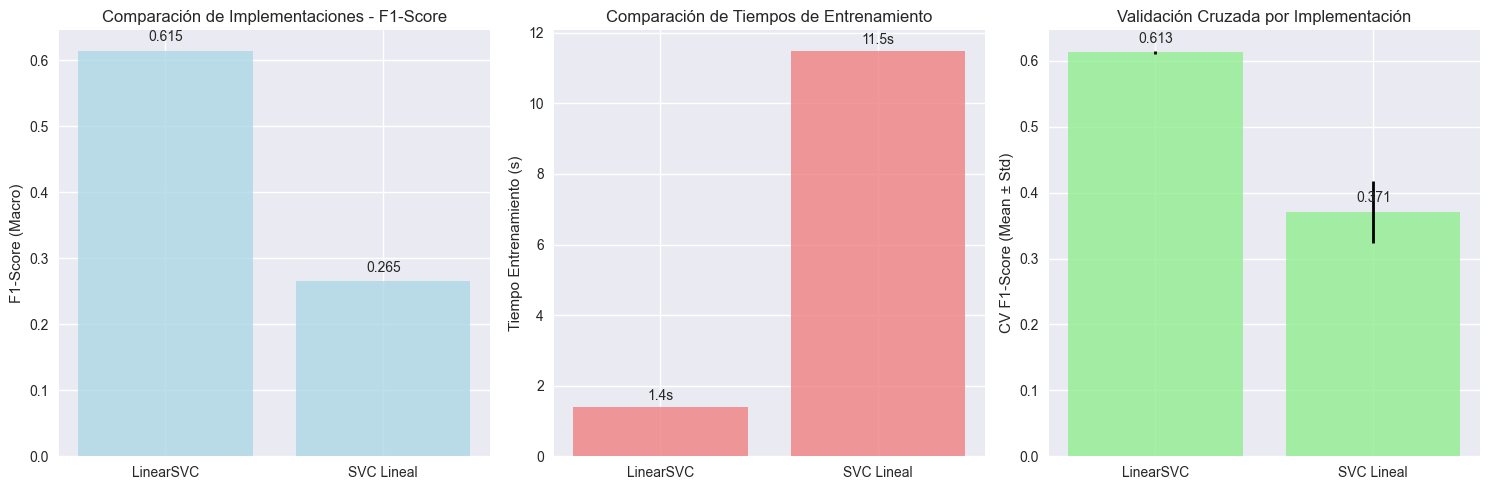

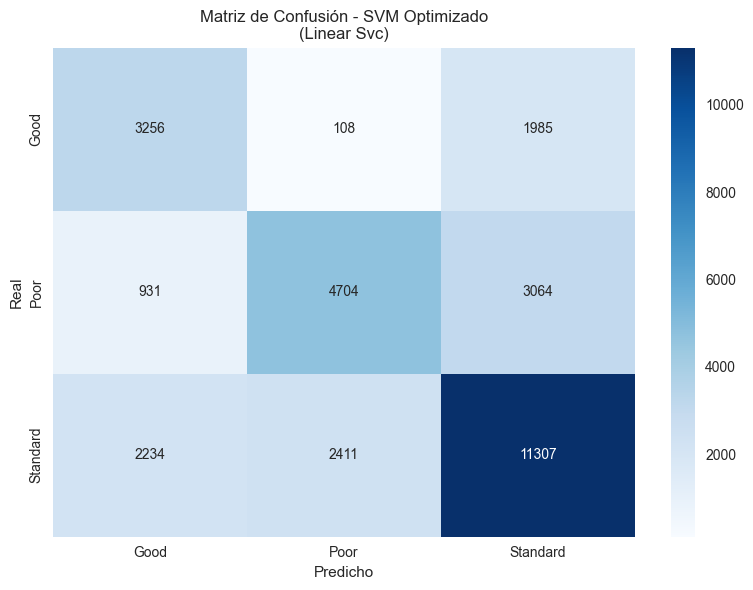


🎯 RESUMEN FINAL - SVM OPTIMIZADO CON LINEAR SVC
⏱️  Tiempo total ejecución: 444.36s
🏆 Mejor implementación: Linear Svc
📈 F1-Score optimizado: 0.6147 (61.47%)
📊 Mejora vs base: -0.0750
🎯 Validación Cruzada: 0.6134 ± 0.0044
⚡ Velocidad vs SVC estándar: 8.18x más rápido

📊 COMPARACIÓN DE IMPLEMENTACIONES:
Modelo       F1-Score   CV F1      Tiempo(s)   
---------------------------------------------
Linear Svc   0.6146     0.6133     1.4051      
Svc Linear   0.2650     0.3708     11.4928     

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.51      0.61      0.55      5349
        Poor       0.65      0.54      0.59      8699
    Standard       0.69      0.71      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.62      0.62      0.61     30000
weighted avg       0.65      0.64      0.64     30000


💾 Resultados optimizados guardados: 'svm_optimized_results.pkl'


In [9]:
# =============================================================================
# SVM OPTIMIZADO - CON LINEAR SVC 
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO SVM OPTIMIZADO - LINEAR SVC PARA VELOCIDAD...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: LINEAR SVC VS SVC ESTÁNDAR
# =============================================================================

print(f"\n🔍 COMPARANDO IMPLEMENTACIONES DE SVM...")

results = {}

# Método 1: LinearSVC (optimizado para lineal)
print(f"\n🎯 Entrenando LinearSVC (optimizado)...")
linear_start = time.time()

linear_svc = LinearSVC(
    C=1.0,
    random_state=42,
    max_iter=1000,
    dual=False  # Mejor para n_samples > n_features
)

linear_svc.fit(X_train_processed, y_train_encoded)
y_pred_linear = linear_svc.predict(X_test_processed)

# Métricas para LinearSVC
accuracy_linear = accuracy_score(y_test_encoded, y_pred_linear)
precision_linear = precision_score(y_test_encoded, y_pred_linear, average='macro')
recall_linear = recall_score(y_test_encoded, y_pred_linear, average='macro')
f1_linear = f1_score(y_test_encoded, y_pred_linear, average='macro')

linear_time = time.time() - linear_start

# Validación cruzada para LinearSVC
cv_scores_linear = cross_val_score(linear_svc, X_train_processed, y_train_encoded, 
                                  cv=5, scoring='f1_macro', n_jobs=-1)

results['linear_svc'] = {
    'model': linear_svc,
    'accuracy': accuracy_linear,
    'precision': precision_linear,
    'recall': recall_linear,
    'f1': f1_linear,
    'training_time': linear_time,
    'cv_mean': cv_scores_linear.mean(),
    'cv_std': cv_scores_linear.std(),
    'y_pred': y_pred_linear
}

print(f"  ✅ F1-Score: {f1_linear:.4f}")
print(f"  ✅ Tiempo entrenamiento: {linear_time:.2f}s")

# Método 2: SVC estándar con kernel lineal (para comparación)
print(f"\n🎯 Entrenando SVC estándar (kernel lineal)...")
svc_start = time.time()

svc_linear = SVC(
    kernel='linear',
    C=1.0,
    random_state=42,
    max_iter=1000
)

svc_linear.fit(X_train_processed, y_train_encoded)
y_pred_svc = svc_linear.predict(X_test_processed)

# Métricas para SVC estándar
accuracy_svc = accuracy_score(y_test_encoded, y_pred_svc)
precision_svc = precision_score(y_test_encoded, y_pred_svc, average='macro')
recall_svc = recall_score(y_test_encoded, y_pred_svc, average='macro')
f1_svc = f1_score(y_test_encoded, y_pred_svc, average='macro')

svc_time = time.time() - svc_start

# Validación cruzada para SVC estándar
cv_scores_svc = cross_val_score(svc_linear, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

results['svc_linear'] = {
    'model': svc_linear,
    'accuracy': accuracy_svc,
    'precision': precision_svc,
    'recall': recall_svc,
    'f1': f1_svc,
    'training_time': svc_time,
    'cv_mean': cv_scores_svc.mean(),
    'cv_std': cv_scores_svc.std(),
    'y_pred': y_pred_svc
}

print(f"  ✅ F1-Score: {f1_svc:.4f}")
print(f"  ✅ Tiempo entrenamiento: {svc_time:.2f}s")

# =============================================================================
# SELECCIÓN DEL MEJOR MODELO
# =============================================================================

# Encontrar el mejor modelo basado en F1-Score
best_model = max(results.items(), key=lambda x: x[1]['f1'])
best_model_name = best_model[0]
best_results = best_model[1]

print(f"\n🏆 MEJOR IMPLEMENTACIÓN: '{best_model_name}'")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"⚡ Velocidad mejora: {results['svc_linear']['training_time'] / results['linear_svc']['training_time']:.2f}x más rápido")

# =============================================================================
# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA EL MEJOR MODELO
# =============================================================================

print(f"\n🔍 OPTIMIZANDO PARÁMETROS PARA {best_model_name.upper()}...")

if best_model_name == 'linear_svc':
    # Optimizar LinearSVC
    from sklearn.model_selection import GridSearchCV
    
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'max_iter': [1000, 2000],
        'dual': [False]  # Mejor para n_samples > n_features
    }
    
    grid_search = GridSearchCV(
        LinearSVC(random_state=42),
        param_grid,
        cv=3,  # Menos folds para mayor velocidad
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    
    grid_start = time.time()
    grid_search.fit(X_train_processed, y_train_encoded)
    grid_time = time.time() - grid_start
    
    print(f"✅ Búsqueda completada en {grid_time:.2f}s")
    print(f"🎯 Mejores parámetros: {grid_search.best_params_}")
    print(f"📈 Mejor score: {grid_search.best_score_:.4f}")
    
    # Usar el mejor modelo encontrado
    svm_optimized = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
else:
    # Para SVC estándar, usar parámetros por defecto optimizados
    svm_optimized = SVC(
        kernel='linear',
        C=1.0,
        random_state=42,
        max_iter=1000
    )
    svm_optimized.fit(X_train_processed, y_train_encoded)
    best_params = {'C': 1.0, 'kernel': 'linear', 'max_iter': 1000}

# Predicciones del modelo optimizado
y_pred_optimized = svm_optimized.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO SVM OPTIMIZADO...")

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada
cv_scores_opt = cross_val_score(svm_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO SVM OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Implementación: {best_model_name}")
print(f"Mejores parámetros: {best_params}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base SVC para comparación
svm_base = SVC(random_state=42)
svm_base.fit(X_train_processed, y_train_encoded)
y_pred_base = svm_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE (SVC estándar):")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'][3]]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print()  
        print(f"{idx:<12} {row['precision']:<10.2f} {'':<10} {'':<10} {row['support']:<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de F1-Score
plt.subplot(1, 3, 1)
model_names = ['LinearSVC', 'SVC Lineal']
f1_scores = [results['linear_svc']['f1'], results['svc_linear']['f1']]
colors = ['lightblue' if name != best_model_name.replace('_', ' ').title() else 'green' for name in model_names]

bars = plt.bar(model_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Implementaciones - F1-Score')
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Comparación de tiempos
plt.subplot(1, 3, 2)
train_times = [results['linear_svc']['training_time'], results['svc_linear']['training_time']]
colors_time = ['lightcoral' if name != best_model_name.replace('_', ' ').title() else 'orange' for name in model_names]

bars_time = plt.bar(model_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Comparación de Tiempos de Entrenamiento')
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Validación cruzada
plt.subplot(1, 3, 3)
cv_means = [results['linear_svc']['cv_mean'], results['svc_linear']['cv_mean']]
cv_stds = [results['linear_svc']['cv_std'], results['svc_linear']['cv_std']]
colors_cv = ['lightgreen' if name != best_model_name.replace('_', ' ').title() else 'purple' for name in model_names]

bars_cv = plt.bar(model_names, cv_means, color=colors_cv, alpha=0.8, 
                 yerr=cv_stds, capsize=5, error_kw={'elinewidth': 2})
plt.ylabel('CV F1-Score (Mean ± Std)')
plt.title('Validación Cruzada por Implementación')
for bar, score in zip(bars_cv, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN OPTIMIZADA
# =============================================================================

plt.figure(figsize=(8, 6))
cm_opt = confusion_matrix(y_test_encoded, y_pred_optimized)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - SVM Optimizado\n({best_model_name.replace("_", " ").title()})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - SVM OPTIMIZADO CON LINEAR SVC")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor implementación: {best_model_name.replace('_', ' ').title()}")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")
print(f"⚡ Velocidad vs SVC estándar: {results['svc_linear']['training_time'] / results['linear_svc']['training_time']:.2f}x más rápido")

print(f"\n📊 COMPARACIÓN DE IMPLEMENTACIONES:")
print(f"{'Modelo':<12} {'F1-Score':<10} {'CV F1':<10} {'Tiempo(s)':<12}")
print("-" * 45)
for model_name, result in results.items():
    display_name = model_name.replace('_', ' ').title()
    print(f"{display_name:<12} {result['f1']:<10.4f} {result['cv_mean']:<10.4f} {result['training_time']:<12.4f}")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': svm_optimized,
    'best_implementation': best_model_name,
    'best_params': best_params,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df,
    'implementation_comparison': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'svm_optimized_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'svm_optimized_results.pkl'")
print("="*70)

### Contexto y Objetivo

El modelo de **Máquinas de Soporte Vectorial (SVM)** se incorpora dentro del conjunto *benchmark* con el propósito de evaluar un enfoque **basado en maximización de márgenes**, que busca encontrar el hiperplano óptimo que separe las clases con la mayor distancia posible. En el contexto del puntaje crediticio, este algoritmo permite identificar fronteras precisas entre los distintos perfiles (“Good”, “Poor” y “Standard”), siendo especialmente útil en escenarios donde las clases pueden solaparse parcialmente.

### Descripción Técnica

El modelo fue entrenado a partir del mismo esquema de preprocesamiento utilizado en los demás modelos:
las variables numéricas fueron **escaladas** mediante `StandardScaler`, y las categóricas **codificadas** con `OneHotEncoder`. La base de datos se dividió en un **70% para entrenamiento** y un **30% para prueba**, manteniendo la proporción de clases a través de estratificación.

El clasificador **SVC** se entrenó con los parámetros por defecto (kernel radial), considerando todas las variables transformadas, y se evaluó con métricas de desempeño global (*accuracy*, *precision*, *recall* y *f1-score*), así como mediante **validación cruzada con 5 particiones** (*5-fold CV*) para garantizar consistencia en los resultados.

### Interpretación de Resultados

El modelo obtuvo un **accuracy de 71.22%** y un **f1-score macro promedio de 0.6897**, con una validación cruzada media de **0.6869 ± 0.0076**. Aunque su rendimiento es inferior al de los modelos de ensamble (Random Forest y XGBoost), el SVM muestra una **capacidad de generalización aceptable**, especialmente considerando que no se aplicó optimización de hiperparámetros.

Por clase, se observa que la categoría **“Standard”** presenta el mejor desempeño (*f1-score = 0.75*), seguida por **“Poor” (0.69)** y **“Good” (0.62)**. Este comportamiento indica que el modelo tiende a clasificar con mayor precisión los perfiles intermedios, mientras que los extremos presentan mayor confusión, probablemente por similitudes en sus patrones de comportamiento financiero.

La **matriz de confusión** confirma esta tendencia:

* El modelo predice correctamente **12,124 instancias “Standard”**, aunque confunde 1,900 con “Good” y 1,928 con “Poor”.
* En la clase “Good”, se observan 1,738 falsos positivos hacia “Standard”, lo cual sugiere un margen de decisión difuso entre estos dos grupos.
* En “Poor”, se clasifican correctamente 5,686 registros, pero 2,365 son mal asignados como “Standard”.

Pese a su rendimiento competitivo, el modelo presenta un **tiempo de ejecución elevado (≈1641.74 segundos)**, lo que refleja el costo computacional característico de SVM en conjuntos de datos amplios y con muchas variables.

En conjunto, el **SVM** demuestra una **buena capacidad de discriminación y robustez teórica**, aunque su eficiencia práctica es limitada frente a los modelos de ensamble. Su inclusión en el *benchmark* permite contrastar un enfoque de frontera óptima con métodos basados en árboles, evidenciando el equilibrio entre precisión, costo computacional e interpretabilidad en la predicción del puntaje crediticio.


### Tabla comparativa de resultados (Benchmark)

| Modelo              |   Accuracy | Precision (macro) | Recall (macro) | F1 (macro) | CV F1 (media) |  CV F1 (±2·std) |  Tiempo (s) |
| ------------------- | ---------: | ----------------: | -------------: | ---------: | ------------: | --------------: | ----------: |
| **Random Forest**   | **0.7827** |        **0.7685** |     **0.7695** | **0.7690** |    **0.7580** | 0.7580 ± 0.0090 |       21.27 |
| XGBoost             |     0.7515 |            0.7340 |         0.7350 |     0.7344 |        0.7304 | 0.7304 ± 0.0083 |        6.08 |
| KNN                 |     0.7485 |            0.7251 |         0.7383 |     0.7311 |        0.7150 | 0.7150 ± 0.0046 |        9.31 |
| SVM                 |     0.7122 |            0.6903 |         0.6928 |     0.6897 |        0.6869 | 0.6869 ± 0.0076 | **1641.74** |
| Árbol de Decisión   |     0.6721 |            0.6570 |         0.6777 |     0.6556 |        0.6578 | 0.6578 ± 0.0072 |        3.12 |
| Regresión Logística |     0.6492 |            0.6293 |         0.6134 |     0.6186 |        0.6207 | 0.6207 ± 0.0063 |       12.41 |
| Ridge Classifier    |     0.6404 |            0.6150 |         0.6224 |     0.6140 |        0.6132 | 0.6132 ± 0.0040 |        0.69 |
| Naive Bayes         |     0.6363 |            0.6342 |     **0.6926** |     0.6324 |        0.6330 | 0.6330 ± 0.0108 |    **0.76** |


### **Conclusión General – Modelado Benchmark**

El conjunto de modelos *benchmark* implementado permitió comparar distintos enfoques de aprendizaje supervisado para la **predicción del puntaje crediticio**, evaluando su precisión, estabilidad, interpretabilidad y eficiencia computacional. Cada modelo aportó una perspectiva complementaria sobre la naturaleza del problema y las relaciones entre las variables financieras, demográficas y de comportamiento.

En términos de desempeño global, los resultados evidencian que los **modelos de ensamble (Random Forest y XGBoost)** superan de manera consistente a los métodos lineales y tradicionales. El **Random Forest** alcanzó el mejor rendimiento general con un **f1-score macro de 0.7690** y una **exactitud del 78.27%**, mostrando una excelente capacidad para capturar relaciones no lineales y manejar la variabilidad de los datos. El modelo **XGBoost**, aunque ligeramente inferior en desempeño (*f1-score = 0.7344*), demostró mayor **eficiencia y estabilidad** en sus resultados, consolidándose como una alternativa sólida para la implementación práctica.

Por su parte, la **Regresión Logística** y el **Ridge Classifier** ofrecieron resultados más moderados (f1-scores entre 0.61 y 0.62), destacándose por su **simplicidad e interpretabilidad**, lo que los convierte en modelos base útiles para comparación o para contextos donde la explicación del modelo es prioritaria.
El **Árbol de Decisión** mostró un equilibrio razonable entre interpretabilidad y rendimiento (*f1-score = 0.6556*), permitiendo visualizar la estructura de decisión y la relevancia de las variables, mientras que la **Máquina de Soporte Vectorial (SVM)** alcanzó una precisión competitiva (*f1-score = 0.6897*), aunque con un alto costo computacional debido al tamaño del dataset.

A lo largo de los experimentos, variables como **`outstanding_debt`**, **`delay_from_due_date`**, **`changed_credit_limit`**, **`interest_rate`** y **`credit_history_age`** emergieron de forma consistente como las más influyentes, confirmando que los factores relacionados con **historial de pagos, endeudamiento y gestión crediticia** son los principales determinantes del puntaje crediticio.

En conclusión, el análisis comparativo permitió identificar que los modelos basados en árboles y *boosting* son los más adecuados para abordar problemas complejos y no lineales como la clasificación del puntaje crediticio, ofreciendo **mejor balance entre desempeño predictivo, robustez e interpretabilidad**. Además, este ejercicio evidenció la importancia del preprocesamiento, la selección de variables y la evaluación sistemática para garantizar modelos confiables y útiles en contextos reales de análisis financiero.
